# Introductory Notes

FINALLY we are ready to do some data-science material.

The fact is, its a very rare situation indeed that you will receive a
"clean" dataset. This might seem like a surprise to you if you are, for
instance, a scientist working in a laboratory setting on small data
sets. In those situations, data collection is quite controlled and while
outliers and unusual circumstances may prevail from time to time, the
data collected is typically small enough that data which represents
error conditions is thrown away early. With the advent of computerized
instruments, errors in recording data (which might have been done by
hand in the past) are very unusual.

But large data sets are different. Many large datasets are generated as
a side effect of some other process and consequently don't reach the
level of cleanliness we expect from lab data. A Sales Database I once
analyzed included a large number of pseudo-duplicate entries because
Salesmen were working around a technical limitation in the database
limiting the number of contracts they could work on: salesmen would
appear multiple times in the database with names like "Smith", "Smith,
Jon", "Smith, Franklin John" etc. Form entry errors for non-essential
data are also very common. A lot of data sets cover years of a
database's existence and sometimes garbage data gets in during a
so-called "database migration" where an old version of the database has
to be moved to a new version.

A good rule of thumb is that in any dataset that is too large for one
person to look at and in which the data is not actively constrained by
some reliable external process there will be errors.

There are also [other sorts of problems](https://www.popularmechanics.com/science/a22577/genetics-papers-excel-errors/):

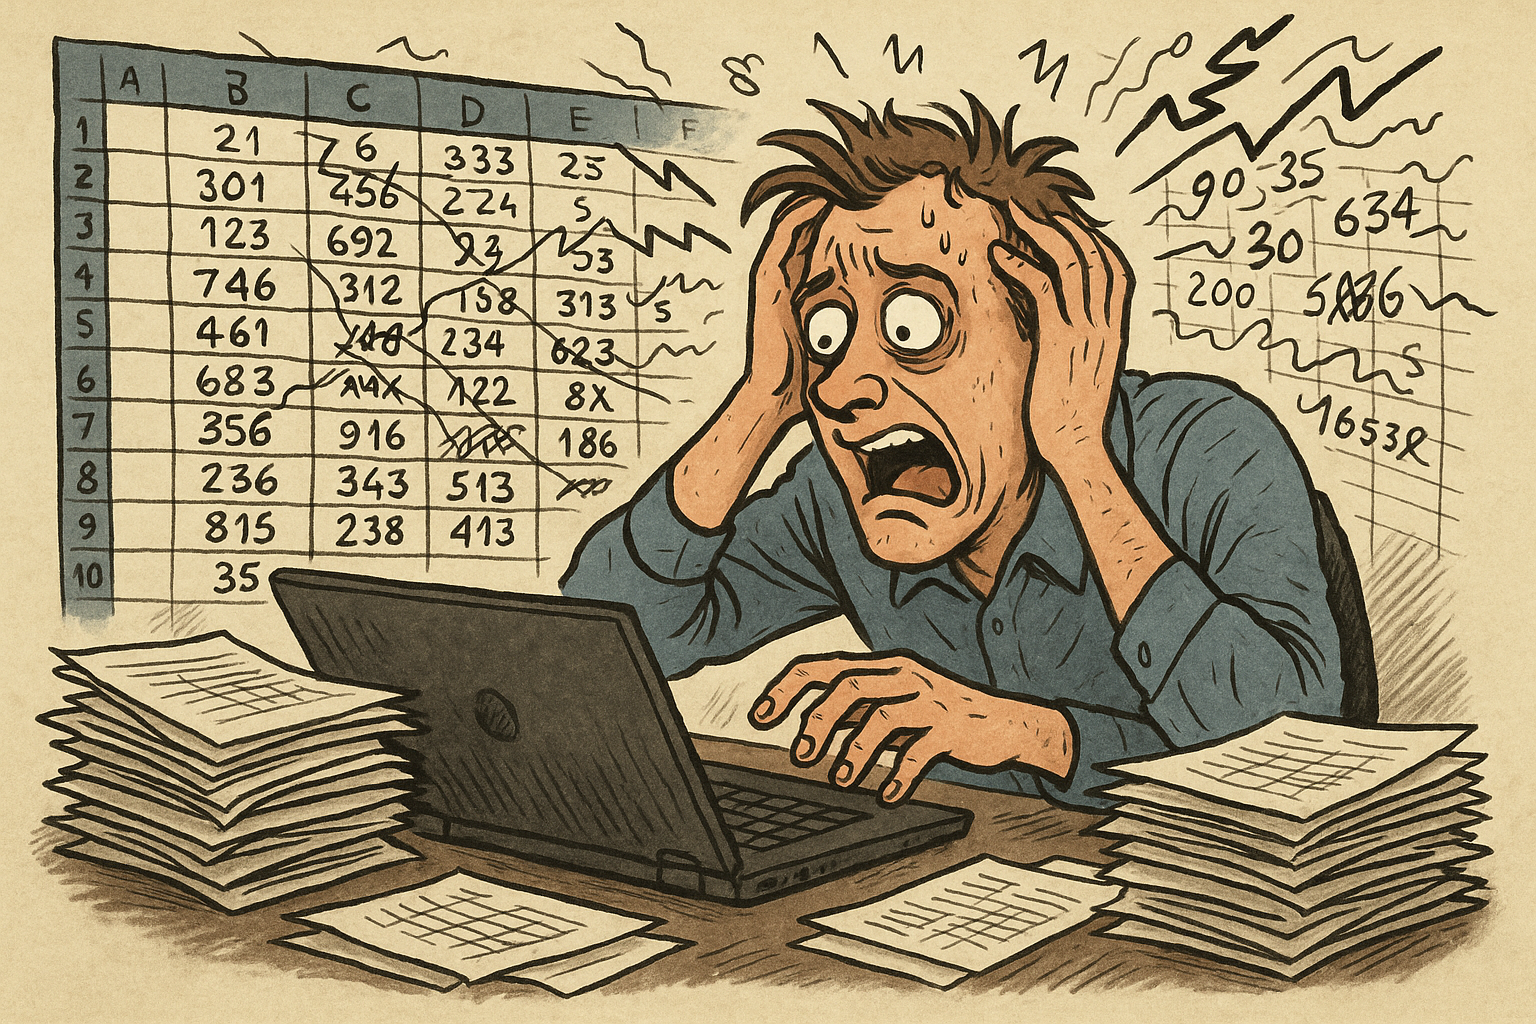

# Common Problems With Data Sets

1.  Duplicate Data (records appear multiple times). This is a really
    deadly error because it can cause you to mix training and testing
    data and dramatically over-estimate the effectiveness of a model.

2.  Pseudo-Duplicate Data - Worse than above - this is data which is not
    strictly identical but is highly correlated with another set of
    records. Just as bad if you miss it.

3.  Missing Data - missing fields in records can cause otherwise smooth
    workflows to fail. Worse, some functions can lift missing data to
    spurious values (like 0) which can throw off statistics and models.
    There may also be a bias in which data is missing or which records
    are affected which will modify the results of summaries and
    modeling.

4.  Incorrectly encoded missing data. It isn't so uncommon to have
    missing values encoded in a variety of ways, even in a single data
    set. You might see a csv file where missing values are incoherently
    encoded like:

    ```         
    ,,"","NA","-","NULL",...
    ```

5.  Poorly encoded data dumps. CSV files (for example) are delimited
    with commas. Sometimes a database dump can dump fields which have
    strings in them which themselves contain commas. Frequently this
    will cause R to barf when it tries to read the data (or give
    warnings that the number of columns in each row is irregular). But
    sometimes you get very unlucky and it just shifts your data around
    in a bad way.

6.  Inconsistently encoded dates or values. Dates are the biggest risk
    here. The tidyverse tries to read columns that look like dates as
    dates, but it will struggled to get it right if there are subtle
    issues. Other gotchas: what time zone was this date/time referring
    to if it doesn't explicitly say? Do the times change to reflect
    daylight savings time? In which case, in what time zone?

The fact is you will encounter all of these issues with data sets in
your career and you will definitely miss some of them at some point.

Further raising the stakes is that all of these problems with data sets
can cause profound problems with your downstream data analysis. So data
cleansing (and recording the process) is among the most important steps
of any data science project.

# How to Defend Yourself

You must spend time getting to know your data. A large part of the
surface area of the Tidyverse is meant to help you do this but some of
R's built in functions can also help.

# Using Dplyr and Readr

R can read a variety of tabular data formats. I'll assume we have a CSV
file for these notes but if you have other tabular data you may want to
look at `readr`'s `read_table`?

We are going to use `readr` to load a file into a `data frame`. R has
its own built in data frame class but `dplyr` provides a more efficient
representation of the same idea. These are called `tibbles` (like
tables). `dplyr` provides a ton of utility methods to operate on
tibbles.

But before we get there lets just get comfortable with data frames.

In [1]:
suppressWarnings({
  ok <- FALSE
  try({
    IRdisplay::display_html(htmltools::HTML("<script src='files/notebook_tooltips.js'></script>"))
    ok <- TRUE
  }, silent=TRUE)
  if (!ok) {
    js <- paste(readLines('notebook_tooltips.js', warn=FALSE), collapse="\n")
    IRdisplay::display_javascript(js)
  }
})


In [2]:
library(tidyverse)

df <- read_csv("source_data/character-data.csv"); # open the data set
df

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 696346 Columns: 4
── Column specification ──

character        universe           property_name     
1      Abraham Dusk     Wildstorm Universe Real Name         
2      Abraham Dusk     Wildstorm Universe Main Alias        
3      Abraham Dusk     Wildstorm Universe Other Aliases     
4      Abraham Dusk     Wildstorm Universe Affiliation       
5      Abraham Dusk     Wildstorm Universe Base Of Operations
6      Abraham Dusk     Wildstorm Universe Alignment         
7      Abraham Dusk     Wildstorm Universe Identity          
8      Abraham Dusk     Wildstorm Universe Citizenship       
9      Abraham Dusk     Wildstorm Universe Marital Status    
10     Abraham Dusk     Wildstorm Universe Occupation        
11     Abraham Dusk     Wildstorm Universe Gender            
12     Abraham Dusk     Wildstorm Universe Hair              
13     Abraham Dusk     Wildstorm Universe Universe          
14     Abraham Dusk     Wildstorm Universe Creators          
15     Accelerated Man  Earth 19           Real Name         
16     Accelerated Man  Earth 19           Main Alias        
17     Accelerated Man  Earth 19           Other Aliases     
18     Accelerated Man  Earth 19           Alignment         
19     Accelerated Man  Earth 19           Identity          
20     Accelerated Man  Earth 19           Gender            
21     Accelerated Man  Earth 19           Universe          
22     Accelerated Man  Earth 19           Creators          
23     Ahn Kwang-Jo     Prime Earth        Real Name         
24     Ahn Kwang-Jo     Prime Earth        Main Alias        
25     Ahn Kwang-Jo     Prime Earth        Other Aliases     
26     Ahn Kwang-Jo     Prime Earth        Relatives         
27     Ahn Kwang-Jo     Prime Earth        Affiliation       
28     Ahn Kwang-Jo     Prime Earth        Alignment         
29     Ahn Kwang-Jo     Prime Earth        Identity          
30     Ahn Kwang-Jo     Prime Earth        Citizenship       
⋮      ⋮                ⋮                  ⋮                 
696317 Zack Stoll       iZombie TV Series  Base Of Operations
696318 Zack Stoll       iZombie TV Series  Alignment         
696319 Zack Stoll       iZombie TV Series  Identity          
696320 Zack Stoll       iZombie TV Series  Race              
696321 Zack Stoll       iZombie TV Series  Citizenship       
696322 Zack Stoll       iZombie TV Series  Marital Status    
696323 Zack Stoll       iZombie TV Series  Occupation        
696324 Zack Stoll       iZombie TV Series  Gender            
696325 Zack Stoll       iZombie TV Series  Eyes              
696326 Zack Stoll       iZombie TV Series  Hair              
696327 Zack Stoll       iZombie TV Series  Universe          
696328 Zombie Master II Earth-S            Real Name         
696329 Zombie Master II Earth-S            Main Alias        
696330 Zombie Master II Earth-S            Alignment         
696331 Zombie Master II Earth-S            Gender            
696332 Zombie Master II Earth-S            Eyes              
696333 Zombie Master II Earth-S            Hair              
696334 Zombie Master II Earth-S            Skin              
696335 Zombie Master II Earth-S            Universe          
696336 Zombie Zeke      Wildstorm Universe Real Name         
696337 Zombie Zeke      Wildstorm Universe Main Alias        
696338 Zombie Zeke      Wildstorm Universe Other Aliases     
696339 Zombie Zeke      Wildstorm Universe Base Of Operations
696340 Zombie Zeke      Wildstorm Universe Alignment         
696341 Zombie Zeke      Wildstorm Universe Race              
696342 Zombie Zeke      Wildstorm Universe Occupation        
696343 Zombie Zeke      Wildstorm Universe Gender            
696344 Zombie Zeke      Wildstorm Universe Hair              
696345 Zombie Zeke      Wildstorm Universe Universe          
696346 Zombie Zeke      Wildstorm Universe Creators          
       value                              
1      Abraham Dusk                       
2      The Metropolitan                   
3      Last Angel                 

Note that `readr` has tried its best for us to guess the appropriate
data types for each column. It does this by examining the first few
values in each column and trying to parse them and then coercing the
rest. In our case this is easy, but `readr` allows you to specify the
types of your columns by hand as well.

In [3]:
df <- read_csv("source_data/character-data.csv", col_types = cols(
  character = col_character(),
  universe = col_character(),
  property_name = col_character(),
  value = col_character()
  ))


This is a trivial example but we could force a numerical column with
`col_number` for instance.

Once we have our data frame loaded we can poke at its variables. Here is
a useful thing to do:

In [4]:
sort(table(df$property_name), decreasing=TRUE)


              Universe              Real Name                 Gender 
                 52515                  51429                  50707 
             Alignment               Creators                   Hair 
                 50057                  47998                  46429 
              Identity             Main Alias                   Eyes 
                 45475                  40509                  39085 
           Affiliation         Marital Status     Base Of Operations 
                 37528                  36654                  34850 
            Occupation            Citizenship              Relatives 
                 32979                  30893                  23715 
                  Race          Other Aliases                 Height 
                 21484                  17150                  10292 
                Weight                   Skin                   Name 
                  9688                   7199                    768 
           Home Pla

Let's see how gender-wise this data set is:

In [5]:
x <- list(5,4,3,5,1)
ii <- c(TRUE, FALSE, TRUE, TRUE, FALSE);
x

[[1]]
[1] 5

[[2]]
[1] 4

[[3]]
[1] 3

[[4]]
[1] 5

[[5]]
[1] 1

In [6]:
library(dplyr);
just_gender <- filter(df, property_name=="Gender")
just_gender
df$property_name == "Gender"

character             universe                   property_name value 
1     Abraham Dusk          Wildstorm Universe         Gender        Male  
2     Accelerated Man       Earth 19                   Gender        Male  
3     Ahn Kwang-Jo          Prime Earth                Gender        Male  
4     Alec Holland          Lego Batman                Gender        Male  
5     Alec Holland          Prime Earth                Gender        Male  
6     Alexander Fairchild   Wildstorm Universe         Gender        Male  
7     Alexander Luthor      Smallville                 Gender        Male  
8     Alexander Staunton    Prime Earth                Gender        Male  
9     Alexander Trent       New Earth                  Gender        Male  
10    Alonzo Malrey         New Earth                  Gender        Male  
11    Alton Carver          Prime Earth                Gender        Male  
12    Andrew Pulaski        Prime Earth                Gender        Male  
13    Anissa Pierce         Black Lightning TV Series  Gender        Female
14    Antiope               Tempest Tossed             Gender        Female
15    Apollo                Wildstorm Universe         Gender        Male  
16    Aquaman               Arthur Curry               Gender        Male  
17    Ares                  Wonder Woman 2009 Movie    Gender        Male  
18    Aristides Demetrios   New Earth                  Gender        Male  
19    Artemis               Wildstorm Universe         Gender        Female
20    Arthur Curry          DC Animated Movie Universe Gender        Male  
21    Asmodel               New Earth                  Gender        Male  
22    Aten                  New Earth                  Gender        Male  
23    Atropos               Arrowverse                 Gender        Female
24    August Heart          Arrowverse                 Gender        Male  
25    August Heart          Prime Earth                Gender        Male  
26    Augustus Freeman      Dakotaverse                Gender        Male  
27    Auron                 New Earth                  Gender        Male  
28    Avery Ho              Future State               Gender        Female
29    Balam                 Prime Earth                Gender        Male  
30    Bane                  DC Animated Movie Universe Gender        Male  
⋮     ⋮                     ⋮                          ⋮             ⋮     
50678 Richard Grayson       DCeased                    Gender        Male  
50679 Rita                  iZombie TV Series          Gender        Female
50680 Russ Roche            iZombie TV Series          Gender        Male  
50681 Sebastian Meyer       iZombie TV Series          Gender        Male  
50682 Selina Kyle           DCeased                    Gender        Female
50683 Simon Dark            New Earth                  Gender        Male  
50684 Solomon Grundy        Earth-22                   Gender        Male  
50685 Solomon Grundy        Earth-One                  Gender        Male  
50686 Solomon Grundy        Super Best Friends Forever Gender        Male  
50687 Solomon Grundy        Super Friends              Gender        Male  
50688 Solomon Grundy        The Batman TV Series       Gender        Male  
50689 Solomon Grundy        The Brave and the Bold     Gender        Male  
50690 Solomon Grundy        Tiny Titans                Gender        Male  
50691 Solomon Grundy clone  Prime Earth                Gender        Male  
50692 Spawn of Frankenstein New Earth                  Gender        Male  
50693 Suzuki                iZombie TV Series          Gender        Male  
50694 Tanner                iZombie TV Series          Gender        Male  
50695 Teth-Adam             DCeased                    Gender        Male  
50696 Theodore Kord         DCeased                    Gender        Male  
50697 Thomas Kirk           New Earth                  Gender        Male  
50698 Timothy Drake         DCeased                   

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [6

Note 2 things about the above:

1.  We are using tidy evaluation - `property_name` isn't in our
    environment, its in the data frame `df`.
2.  We are doing a vector-wise comparison of `property_name` to
    "Gender". The expression `property_name=="Gender"` produces a
    boolean array. The True indexes are returned and the False indexes
    are thrown away.

Now we have a table just covering the Gender Property. What are the
unique values?

In [7]:
table(just_gender$value);


    Female Genderless       Good   Intersex       Male Non-binary     female 
     15467        271          6          7      34873         78          1 
      male 
         4 

Already we have some errors in our data set (and some ambiguities). This
data might be easier to think about in its own tabular form. We can use
`dplyr` to get there:

In [8]:
arrange(tally(group_by(just_gender, value)),n)

value      n    
1 female         1
2 male           4
3 Good           6
4 Intersex       7
5 Non-binary    78
6 Genderless   271
7 Female     15467
8 Male       34873

When looking for unusual conditions its good to sort from smallest to
largest.

One of the most satisfying things about data science is that it doesn't
take a lot of digging to find interesting stuff in many data sets:

1.  More than twice as many comic book characters are male than female.
2.  There are very few gender-noncomforming characters. Even fewer than
    "Genderless" ones (is this a meaningful distinction in this data
    set?)
3.  This is a remarkably clean data set. There are only a few
    pseudo-duplicates and only 6 completely incorrect entries.

When we see something unusual its worth double checking it. Let's take a
look at the "Good" gendered characters. Maybe something funny is going
on beyond just a misplaced value.

In [9]:
filter(just_gender, value=="Good");

character universe    property_name value
1 Scot      Lego Batman Gender        Good 
2 Scot      Lego Batman Gender        Good 
3 Scot      Lego Batman Gender        Good 
4 Scot      Lego Batman Gender        Good 
5 Scot      Lego Batman Gender        Good 
6 Scot      Lego Batman Gender        Good

Well, a few new things pop out. We have a lot of duplicate entries here.

But before we deal with that lets check [our
source](https://dc.fandom.com/wiki/Scot_(Lego_Batman)) for this
character and see if we can figure out why their gender is "Good."

This looks like a genuine mistake.

We've know learned enough to start officialy tidying up this data set.

Even though we've just noticed the duplicates, there is actually a step
we can do before we remove duplicates that will simplify futher steps.

Let's reduce the variability of our values in a way unlikely to
introduce issues with our data:

In [10]:
library(stringr); # string manipulation functions
## lowercase and remove non-ascii characters
simplify_strings <- function(s){
    s <- str_to_lower(s);
    s <- str_trim(s);
    s <- str_replace_all(s,"[^a-z]+","_")
    s
}
simplify_strings(c(" ha", "ha! ", "aha!ha", "aha ha"))


[1] "ha"     "ha_"    "aha_ha" "aha_ha"

## An Aside: Magrittr

You might notice there is a pattern in the function we wrote above: a
series of lines overwriting a variable on each line. There are other
ways we could have written it. This is more explicit:

In [11]:
simplify_strings <- function(s){
    s <- str_to_lower(s);
    s1 <- str_trim(s);
    s2 <- str_replace_all(s1,"[^a-z]+","_")
    s2
}

But error prone and still verbose. We could eliminate the temporary
variables like this:

In [12]:
simplify_strings <- function(s){
    str_replace_all(str_trim(str_to_lower(s)), "[^a-z]+","_");
}

But some people find this less than readable. In particular, in english
we tend to read right to left, but the above happens left to right and
it can be hard to parse out precisely which arguments go with which
functions.

In bash, we we could spend time learning if you all wish:

```         
> find . -type R | xargs grep do_something_important | cut -d':' -f 1
\| sort uniq
```

Magrittr is a part of the tidyverse that allows us to build similar
pipelines in R. It provides a `%>%` binary operator which stitches
together its arguments.

In [13]:
simplify_strings <- function(s){
    s %>% 
        str_to_lower() %>%
        str_trim() %>%
        str_replace_all("[^a-z1-9]+","_") %>%
        str_replace_all("^_+","") %>% # added these lines after looking at the data
        str_replace_all("_+$","");
}


You can think of this as "putting the result of the previous expression
into the first argument slot of the next expression" thus forming a
pipe. We will now start using this pipeline operator almost everywhere,
including in dplyr pipelines.

## Back to Business:

Let's simplify all the columns of our data set and then take the unique
values.

In [14]:
`a weird var` <- 10

In [15]:

names(df) <- simplify_strings(names(df)); ## simplify our column names
                                          ## as well

deduplicated <- df %>% mutate(across(everything(), simplify_strings)) %>%
    distinct();
print(sprintf("Before simplification and deduplication: %d, after %d (%0.2f %% decrease)",
              nrow(df),
              nrow(deduplicated),
              100-100*nrow(deduplicated)/nrow(df)));

[1] "Before simplification and deduplication: 696346, after 140773 (79.78 % decrease)"


It is useful to print out how much a data set changes (by some measure)
before and after modification. Now we can re-examine our gender data,
for instance:

In [16]:
deduplicated %>% filter(property_name=="gender") %>% group_by(value) %>% tally() %>%
    arrange(desc(n));

value      n   
1 male       7392
2 female     3378
3 genderless   71
4 non_binary   18
5 good          1
6 intersex      1

Note that we are still seeing a pretty big bias towards male characters.
Let's go ahead and canonicalize a set of genders and filter out those
that don't belong.

In [17]:
non_erroneous_genders <- str_split("intersex non_binary genderless female male", " ", simplify=TRUE);
tidied_data <- deduplicated %>% filter((property_name == "gender" & 
                                        (value %in% non_erroneous_genders)) |
                                       property_name != "gender");
tidied_data %>% filter(property_name=="gender") %>% group_by(value) %>% tally() %>%
    arrange(desc(n));

value      n   
1 male       7392
2 female     3378
3 genderless   71
4 non_binary   18
5 intersex      1

Now let's take a look at what other sorts of data we have.

In [18]:
properties <- tidied_data %>% 
    group_by(property_name) %>% 
    tally() %>% 
    arrange(desc(n)) %>% 
    head(100)
properties

property_name         n    
1  universe              11271
2  real_name             11044
3  gender                10860
4  alignment             10722
5  creators              10166
6  hair                   9532
7  identity               9446
8  main_alias             8683
9  eyes                   7572
10 affiliation            7569
11 marital_status         6942
12 base_of_operations     6826
13 citizenship            6569
14 occupation             6520
15 relatives              4018
16 race                   3261
17 other_aliases          2839
18 height                 1678
19 weight                 1574
20 skin                   1250
21 inkers                  191
22 pencilers               190
23 writers                 148
24 name                    134
25 sector                  123
26 aliases                 100
27 number_of_limbs          98
28 home_planet              96
29 body_type                89
30 number_of_fingers        81
⋮  ⋮                     ⋮    
50 status                23   
51 official_team_name    21   
52 enemies               20   
53 allies                19   
54 additional_designers  14   
55 average_height        11   
56 place_of_formation    11   
57 team_aliases          11   
58 model                 10   
59 current_members        9   
60 place_of_destruction   9   
61 former_members         7   
62 team_leader_s          7   
63 average_weight         6   
64 dimensions             6   
65 version                6   
66 publisher              4   
67 place_of_defunction    3   
68 planet                 3   
69 country                2   
70 galaxy                 2   
71 organization_leader_s  2   
72 star_system            2   
73 city                   1   
74 current_model          1   
75 nicknames              1   
76 number_of_eyes         1   
77 place_of_death         1   
78 state                  1   
79 vehicle_type           1

Keeping with the theme of examining gender constructs in comics, let's
look at a few things which we may expect to vary by gender.

In [19]:
prop_table <- function(df, property){
    df %>% filter(property_name == property) %>% group_by(value) %>%
        tally() %>% arrange(desc(n));
}

prop_table(tidied_data, "alignment");

value   n   
1 good    5002
2 bad     4488
3 neutral 1232

In [20]:
prop_table(tidied_data, "hair")

value                                n   
1   black                                2819
2   brown                                1408
3   blond                                1216
4   no_hair                              1085
5   red                                   703
6   white                                 613
7   bald                                  526
8   grey                                  206
9   green                                 139
10  blue                                   88
11  purple                                 69
12  orange                                 64
13  auburn                                 47
14  pink                                   37
15  black_white                            22
16  silver                                 21
17  strawberry_blond                       21
18  white_balding                          18
19  black_bald                             14
20  black_grey                             14
21  gold                                   14
22  brown_bald                             13
23  brown_white                            11
24  yellow                                 11
25  bald_black                             10
26  black_balding                          10
27  blond_brown                             8
28  white_black                             8
29  black_brown                             7
30  black_green                             7
⋮   ⋮                                    ⋮   
191 red_bald_see_notes                   1   
192 red_black_as_big_shot                1   
193 red_formerly                         1   
194 red_formerly_none                    1   
195 red_green                            1   
196 red_no_hair_see_notes                1   
197 red_orange                           1   
198 red_white_see_notes                  1   
199 red_with_enchantress_blond_naturally 1   
200 reddish_black                        1   
201 sandy_red                            1   
202 snakes                               1   
203 strawberry                           1   
204 tentacle_like_hair                   1   
205 unknown                              1   
206 vlack_green                          1   
207 white_black_balding                  1   
208 white_black_formerly                 1   
209 white_blue                           1   
210 white_brown_originally               1   
211 white_grey                           1   
212 white_naturally_red_with_june        1   
213 white_no_hair                        1   
214 white_no_hair_as_blight              1   
215 white_none                           1   
216 white_orange                         1   
217 white_projectra_blond_sensor_girl    1   
218 white_red_black                      1   
219 white_silver                         1   
220 white_strawberry_blond_formerly      1

In [21]:
prop_table(tidied_data, "eyes")

value                        n   
1   blue                         2187
2   brown                        1378
3   black                        1145
4   red                           707
5   green                         683
6   white                         322
7   yellow                        314
8   no_eyes                       121
9   photocellular                  92
10  grey                           76
11  purple                         60
12  orange                         46
13  hazel                          43
14  pink                           31
15  violet                         28
16  gold                           25
17  amber                          21
18  blue_red                       15
19  red_eyes                       14
20  brown_blue                     11
21  blue_green                      9
22  black_eyes                      8
23  brown_white                     8
24  black_red                       7
25  blue_brown                      7
26  brown_photocellular             7
27  brown_red                       7
28  silver                          7
29  blue_white                      6
30  red_photocellular               6
⋮   ⋮                            ⋮   
121 orange_formerly_brown        1   
122 pale_blue                    1   
123 photocelluar                 1   
124 photocellular_brown_formerly 1   
125 photocellular_red            1   
126 photocellulars               1   
127 pink_blue                    1   
128 pink_brown                   1   
129 purple_orange_white          1   
130 red_amber                    1   
131 red_and_black                1   
132 red_blue_formerly            1   
133 red_currently_blue_formerly  1   
134 red_formerly_blue            1   
135 red_formerly_brown_green     1   
136 red_green_formerly           1   
137 red_originally_blue          1   
138 red_pupils_black_sclera      1   
139 red_varies                   1   
140 red_white                    1   
141 red_yellow                   1   
142 silver_photocellular         1   
143 white_as_ultimate_man        1   
144 white_formerly_blue          1   
145 white_formerly_brown         1   
146 white_green                  1   
147 white_no_pupils              1   
148 yellow_brown_formerly        1   
149 yellow_purple                1   
150 yellow_red_black_formerly    1

In [22]:
prop_table(tidied_data, "marital_status")

value             n   
1  single            5824
2  married            655
3  widowed            275
4  divorced           124
5  engaged             30
6  separated           24
7  remarried            3
8  widowed_single       2
9  divorced_widowed     1
10 married_1            1
11 married_see_notes    1
12 widowed_divorced     1
13 widowed_married      1

In [23]:
prop_table(tidied_data, "occupation")

value                                          n  
1    adventurer                                     471
2    criminal                                       374
3    student                                        194
4    legionnaire                                    171
5    scientist                                      142
6    professional_criminal                          140
7    soldier                                        107
8    mercenary                                       98
9    green_lantern                                   96
10   superhero                                       85
11   assassin                                        82
12   vigilante                                       64
13   sorcerer                                        59
14   warrior                                         57
15   terrorist                                       52
16   reporter                                        48
17   adventurer_student                              46
18   police_officer                                  45
19   conqueror                                       40
20   magician                                        40
21   queen                                           40
22   thief                                           38
23   pet                                             36
24   government_agent                                35
25   super_villain                                   35
26   king                                            31
27   bounty_hunter                                   26
28   sorceress                                       24
29   crimelord                                       21
30   doctor                                          21
⋮    ⋮                                              ⋮  
2598 watch_repair_criminal                          1  
2599 watchmaker                                     1  
2600 water_elemental_former_environmentalist        1  
2601 water_goddess                                  1  
2602 weapons_maker                                  1  
2603 weaver_of_the_threads_of_fate                  1  
2604 werewolf                                       1  
2605 whimsical_being                                1  
2606 wife_formerly_warrior                          1  
2607 wildlife_preservasionist_former_actress        1  
2608 wind_god                                       1  
2609 witch_formerly_princess                        1  
2610 witch_mass_murderer_occasional_adventurer      1  
2611 witch_protector_of_women                       1  
2612 wizard_guardian_of_aethyr_s_border_realm       1  
2613 wizard_guardian_of_good                        1  
2614 world_collector_guard                          1  
2615 world_conqueror_criminal                       1  
2616 world_conqueror_news_paper_reporter_and_editor 1  
2617 world_defender                                 1  
2618 world_destroyer_conqueror                      1  
2619 world_protector                                1  
2620 would_be_universal_conqueror                   1  
2621 would_be_world_conqueror                       1  
2622 writer_artist                                  1  
2623 yara_flor_s_steed                              1  
2624 yellow_lantern                                 1  
2625 zealot_former_missionary                       1  
2626 zoner                                          1  
2627 zoologist                                      1

We can see a few unusual things in these tables. There are a few ways to
approach this. We could restrict ourselves to a handful of properties of
interest and clean them by hand. But I'm going to take a more of a
shotgun approach here:

We're going to throw away any value from any property which appears less
than 20 times. Extremely rare properties aren't going to be of much use
to us anyway.

There are many ways we can do this and we can get complicated about the
criteria. But I'm going to do it the simplest: I'm just going to throw
out rows with very rare values.

This is a chance for us to look at a slightly less than trivial
manipulation and to experiment with joins.

In [24]:

value_counts <- tidied_data %>% group_by(value) %>% tally() %>%
    arrange(n);
value_counts

value                                       n   
1     111_lbs_5_kg                                1   
2     115_lbs_52_kg_1                             1   
3     116_lbs_53_kg                               1   
4     117_lbs_53_kg                               1   
5     118_lbs_54_kg_variable_as_byte              1   
6     11_2_lbs_5_kg                               1   
7     11_4                                        1   
8     11_at_the_shoulder                          1   
9     11_lbs_499_kg_1                             1   
10    122_lbs_55_kg_9_lbs_as_amy                  1   
11    123_lbs_56_kg_1                             1   
12    124_lbs_56_kg_2                             1   
13    124_lbs_56_kg_3                             1   
14    125_lbs_57_kg_215_lbs_in_adult_form         1   
15    125_lbs_57_kg_215lbs_in_adult_form          1   
16    1265_lbs_574_kg                             1   
17    126_lbs_57_kg_1                             1   
18    129                                         1   
19    12_lbs_54431_kg                             1   
20    131_lbs_59_kg_1                             1   
21    1345_lbs_61_kg                              1   
22    135_lbs                                     1   
23    137_lbs_62_kg_1                             1   
24    137_lbs_62_kg_2_5lbs_as_blackrock           1   
25    13_bleak_street_in_gotham_city              1   
26    1425_lbs_646_kg                             1   
27    145_lbs                                     1   
28    147_lbs_67_kg_as_son_of_vulcan_215_lbs      1   
29    14_2                                        1   
30    14_lbs_64_kg_35_lbs_with_experimental_venom 1   
⋮     ⋮                                           ⋮   
29086 yellow                                       385
29087 kryptonian                                   386
29088 earth_one                                    410
29089 grey                                         414
29090 adventurer                                   471
29091 amazon                                       497
29092 bald                                         526
29093 gotham_city                                  552
29094 earth_one_new_earth                          617
29095 married                                      655
29096 no_hair                                     1085
29097 green                                       1107
29098 white                                       1149
29099 blond                                       1218
29100 neutral                                     1237
29101 prime_earth                                 1464
29102 red                                         1501
29103 unknown                                     2022
29104 new_earth                                   2064
29105 blue                                        2425
29106 brown                                       2813
29107 female                                      3379
29108 black                                       3980
29109 american                                    4163
29110 public_identity                             4472
29111 bad                                         4493
29112 secret_identity                             4860
29113 good                                        5004
29114 single                                      5824
29115 male                                        7392

If we check these out we can see that we have a lot of weird ones - it
seems like some of the assumptions we've used to simplify the data have
messed up some rows where multiple comma separated values and/or
explanatory sentences have appeared.

We could try to salvage these but for the sake of brevity we're just
going to chop them off.

In [25]:
ok_values <- value_counts %>% filter(n>=10) %>% `[[`("value");
ok_values

[1] "127_lbs_58_kg"                                                  
   [2] "193_lbs_88_kg"                                                  
   [3] "alfred_bester_martin_nodell"                                    
   [4] "bald_black"                                                     
   [5] "ben_oda"                                                        
   [6] "bizarro_league"                                                 
   [7] "black_balding"                                                  
   [8] "bodyguard"                                                      
   [9] "captain_atom"                                                   
  [10] "carggite"                                                       
  [11] "cary_bates"                                                     
  [12] "castle_bat"                                                     
  [13] "christos_n_gage_doug_mahnke"                                    
  [14] "david_slack"                                                    
  [15] "deimos"                                                         
  [16] "dennis_o_neil_dick_dillin"                                      
  [17] "diana_of_paradise_island"                                       
  [18] "dictator"                                                       
  [19] "dinah_lance"                                                    
  [20] "donnerverse"                                                    
  [21] "doom_patrol_headquarters"                                       
  [22] "earth_1198"                                                     
  [23] "earth_124_1"                                                    
  [24] "earth_43"                                                       
  [25] "earth_s_new_earth"                                              
  [26] "egypt"                                                          
  [27] "fire"                                                           
  [28] "garth_ennis_darick_robertson"                                   
  [29] "geoff_johns_andy_kubert"                                        
  [30] "geoff_johns_paul_pelletier"                                     
  [31] "gerard_way_nick_derington"                                      
  [32] "gerry_conway_curt_swan"                                         
  [33] "gerry_conway_rafael_kayanan"                                    
  [34] "goliath"                                                        
  [35] "grant_morrison_marcus_to"                                       
  [36] "grant_morrison_simone_bianchi"                                  
  [37] "hall_of_justice"                                                
  [38] "human_alien_hybrid_kryptonian"                                  
  [39] "hush_beyond"                                                    
  [40] "ice"                                                            
  [41] "invisible_kid"                                                  
  [42] "italian"                                                        
  [43] "jaime_reyes"                                                    
  [44] "jason_rusch"                                                    
  [45] "jefferson_pierce"                                               
  [46] "jim_shooter_win_mortimer"                                       
  [47] "jla_created_equal"                                              
  [48] "joe_gill_steve_ditko"                                           
  [49] "john_francis_moore_kieron_dwyer"                                
  [50] "journalist"                                                     
  [51] "julius_schwartz_gardner_fox_murphy_anderson"                    
  [52] "justice_society"                                                
  [53] "k_hym_j_onzz"                                                   
  [54] "keith_giffen_john_rogers_cully_hamner"                          
  [55] "king_shark"                                          

Note that we can filter out the unwanted properties with a line like:

In [26]:
tidied_data <- tidied_data %>% filter(value %in% ok_values);

But this is a reasonably good time to introduce *joins*.

## Joins

In the world of tidy data (and in any world based on tabular data), you
will often find the need to combine two data sets based on some
criteria.

In our toy example above, we have two data sets: our character-level
data set, where each row contains a character, a universe, a
property_name and a value; and a second data set consisting of rows
containing a property name and a count associated with it.

We might like to combine these two sets into a third which contains all
the columns of both sets, joined up appropriately. This would result in
a data set with character, universe, property_name, value and
value_count. This combination is called a "join" on the "property_name"
column.

Once we have the `value_count` attached to our rows, we can filter out
all rows where the value count is smaller than 10 and then throw away
the `value_count` property entirely.

This sounds simple enough, but we should think about what could go wrong
in the general case. Consider two tables, the left and the right. For
simplicity, we'll join on a "column" which is shared by both tables. The
following things might happen:

1.  every value in the left table occurs exactly once in the right
    table.
2.  some values appear more often in the right or left table.
3.  the left table has values the right table doesn't have.
4.  the right table has values the left table doesn't have.

1 excludes 2-4 but 2-4 can coexist. What we want to do in these
situations decides the "type" of join we want to perform.

1.  left join: keep every row from the left table, substitute some
    missing or other value for right table values when there is not a
    match.
2.  right join: same as above, but right for left.
3.  inner_join: keep only rows where there is a matching index.

There is another kind of join: a cross join. This just pairs each row of
left with every row of right. You may want to do this in some situations
but it tends to blow up your data volume fast. Typically you will do a
filter immediately after a cross join and select a small criteria. Eg:
you want all the points in a data set which are less than some euclidean
distance from one another. This is a cross join and a filter. But if you
need to do this for a very large data set you will need a custom data
structure or database.

Note that a join can *make your data set bigger* if matching key columns
appear more than once in the left or right table.

Joins are all over the place: they occur in dplyr, pandas and sql. They
are quite general. Its worth developing at least a superficial
understanding.

In [27]:
joined <- tidied_data %>% inner_join(value_counts, by="value");
joined

character        universe           property_name     
1     abraham_dusk     wildstorm_universe alignment         
2     abraham_dusk     wildstorm_universe identity          
3     abraham_dusk     wildstorm_universe citizenship       
4     abraham_dusk     wildstorm_universe marital_status    
5     abraham_dusk     wildstorm_universe occupation        
6     abraham_dusk     wildstorm_universe gender            
7     abraham_dusk     wildstorm_universe hair              
8     abraham_dusk     wildstorm_universe universe          
9     accelerated_man  earth_19           real_name         
10    accelerated_man  earth_19           alignment         
11    accelerated_man  earth_19           identity          
12    accelerated_man  earth_19           gender            
13    ahn_kwang_jo     prime_earth        alignment         
14    ahn_kwang_jo     prime_earth        identity          
15    ahn_kwang_jo     prime_earth        marital_status    
16    ahn_kwang_jo     prime_earth        gender            
17    ahn_kwang_jo     prime_earth        eyes              
18    ahn_kwang_jo     prime_earth        hair              
19    ahn_kwang_jo     prime_earth        universe          
20    alec_holland     lego_batman        main_alias        
21    alec_holland     lego_batman        alignment         
22    alec_holland     lego_batman        identity          
23    alec_holland     lego_batman        citizenship       
24    alec_holland     lego_batman        marital_status    
25    alec_holland     lego_batman        occupation        
26    alec_holland     lego_batman        gender            
27    alec_holland     lego_batman        height            
28    alec_holland     lego_batman        weight            
29    alec_holland     lego_batman        eyes              
30    alec_holland     lego_batman        hair              
⋮     ⋮                ⋮                  ⋮                 
98216 theodore_kord    dceased            gender            
98217 theodore_kord    dceased            universe          
98218 timothy_drake    dceased            main_alias        
98219 timothy_drake    dceased            base_of_operations
98220 timothy_drake    dceased            alignment         
98221 timothy_drake    dceased            identity          
98222 timothy_drake    dceased            citizenship       
98223 timothy_drake    dceased            marital_status    
98224 timothy_drake    dceased            occupation        
98225 timothy_drake    dceased            gender            
98226 timothy_drake    dceased            hair              
98227 timothy_drake    dceased            universe          
98228 wild_bill_hickok new_earth          alignment         
98229 wild_bill_hickok new_earth          identity          
98230 wild_bill_hickok new_earth          citizenship       
98231 wild_bill_hickok new_earth          gender            
98232 wild_bill_hickok new_earth          hair              
98233 zombie_master_ii earth_s            real_name         
98234 zombie_master_ii earth_s            alignment         
98235 zombie_master_ii earth_s            gender            
98236 zombie_master_ii earth_s            eyes              
98237 zombie_master_ii earth_s            hair              
98238 zombie_master_ii earth_s            skin              
98239 zombie_master_ii earth_s            universe          
98240 zombie_zeke      wildstorm_universe alignment         
98241 zombie_zeke      wildstorm_universe race              
98242 zombie_zeke      wildstorm_universe gender            
98243 zombie_zeke      wildstorm_universe hair              
98244 zombie_zeke      wildstorm_universe universe          
98245 zombie_zeke      wildstorm_universe creators          
      value                  n   
1     good                   5004
2     secret_identity        4860
3     american               4163
4     single                 5824
5     government_agent         35
6     male          

Now that we have our join we can filter our data set:

In [28]:
tidied_data <- joined %>% filter(n>10) %>% select(-n);

Exploration of other joins is left to homework exercises.

## Other Summaries

You can often get a good sense about how to approach a data set by
grouping on more than one column. What we want to do next is pose
questions like:

Are male (coded) characters more or less likely to be married than
female (coded) characters?

But to answer this question we have to delve into "tidy" data.

## Tidy vs Non-Tidy Data

An important idea in the tidyverse is "tidy" data. This means more than
just clean or nice data. It means that whatever our concept of an
"observation" is our data frames should contain one row per observation.
At present our data is *very* tidy because I wrote the web scraper to
scrape into a tidy form.

In our case an observation is a "character, universe, property_name, and
value".

The tidyverse assumes that your data is tidy in its design. This allows
it to be much simpler than it might otherwise be.

But not all data is tidy to begin with. Its pretty common to see
so-called "wide" data:

In [29]:
u <- read_csv("untidy-example.csv")
u

Rows: 2 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, universe
dbl (4): super_strength, super_speed, super_healing, super_intelligence

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name     universe    super_strength super_speed super_healing
1 batman   earth_prime 0              0           0            
2 superman earth_prime 1              1           1            
  super_intelligence
1 1                 
2 1

This dataset contains many observations per row. This can make certain
things easier (for instance, we can easily count how often
super_strength and super_speed appear together). But it won't fly with
many tidyverse functions. We need to learn how to "narrow" "wide" data.

## Pivots

The tidyverse package `tidyr` has functions for narrowing and widening
data sets.

In [30]:
library(tidyr)
pivot_longer(u, cols=super_strength:super_intelligence, values_to="value", names_to="power")

name     universe    power              value
1 batman   earth_prime super_strength     0    
2 batman   earth_prime super_speed        0    
3 batman   earth_prime super_healing      0    
4 batman   earth_prime super_intelligence 1    
5 superman earth_prime super_strength     1    
6 superman earth_prime super_speed        1    
7 superman earth_prime super_healing      1    
8 superman earth_prime super_intelligence 1

You may notice that this is more or less how my power dataset looks.

You will need to have your data in tidy format to use ggplot
effectively.

But in our case, we really do want to compare gender and marital status,
so we want to widen (a subset) of our data.

In [31]:
gender_marital <- tidied_data %>%
    filter(property_name == 'gender' | property_name == 'marital_status');


When we `pivot_longer` we need to understand which columns we need to
convert to observations. To `pivot_wider` we need to understand which
observations we want to convert to rows.

But we have a bit more tidying to do before we can get there. Question:
it seems obvious, but how can we be sure that we don't have unique
characters here with two or more genders or marital statuses?

This is a disadvantage of tidy data: we may have repeat or even
logically mutually exclusive observations.

Let's examine that question.

In [32]:
gender_marital %>% filter(property_name == 'gender') %>%
    group_by(character, universe) %>% tally() %>%
    arrange(desc(n));

character        universe                      n
1     5_chad           prime_earth                   1
2     666              earth_22                      1
3     a_calculus       prime_earth                   1
4     a_hwiirdh_paan_a new_earth                     1
5     a_j              new_earth                     1
6     a_k_fortesan     izombie_tv_series             1
7     a_m_a_z_o        arrowverse                    1
8     a_monn_a_mokk    new_earth                     1
9     a_morr           new_earth                     1
10    a_mortal         new_earth                     1
11    a_train          the_boys                      1
12    aagog            prime_earth                   1
13    aalok            new_earth                     1
14    aarl             pre_zero_hour                 1
15    aaron_cash       prime_earth                   1
16    aaron_helzinger  arrowverse                    1
17    aaron_helzinger  new_earth                     1
18    aaron_helzinger  prime_earth                   1
19    aaron_langstrom  new_earth                     1
20    abaddon          earth_s                       1
21    abaddon          new_earth                     1
22    abel             new_earth                     1
23    abel             prime_earth                   1
24    abel_cuvier      dcau                          1
25    abel_tarrant     green_lantern_animated_series 1
26    abel_tarrant     new_earth                     1
27    abel_tarrant     prime_earth                   1
28    abigail          swamp_thing_199_tv_series     1
29    abigail_arcane   new_earth                     1
30    abigail_arcane   prime_earth                   1
⋮     ⋮                ⋮                             ⋮
10830 zoe_saugin       post_zero_hour                1
10831 zombie           prime_earth                   1
10832 zombie_master_ii earth_s                       1
10833 zombie_zeke      wildstorm_universe            1
10834 zond             earth_one                     1
10835 zone_child       new_earth                     1
10836 zonuz            prime_earth                   1
10837 zook             new_earth                     1
10838 zor_el           earth_one                     1
10839 zor_el           new_earth                     1
10840 zor_el           prime_earth                   1
10841 zor_el           scooby_doo_team_up            1
10842 zor_el           smallville                    1
10843 zor_el           unbound                       1
10844 zora_vi_lar      earth_5_8                     1
10845 zorgul           just_imagine                  1
10846 zoro             earth_s                       1
10847 zorrm            new_earth                     1
10848 zot              prime_earth                   1
10849 zou_kang         new_earth                     1
10850 zuggernaut       new_earth                     1
10851 zuma             prime_earth                   1
10852 zumbado          prime_earth                   1
10853 zushan           prime_earth                   1
10854 zviad_baazovi    earth_16                      1
10855 zyklon           new_earth                     1
10856 zymyr            pre_zero_hour                 1
10857 zyn              new_earth                     1
10858 zypto            earth_one                     1
10859 zzlrrrzzzm       new_earth                     1

Looks like our gender data is good.

In [33]:
marital_status_counts <- gender_marital %>%
    filter(property_name == 'marital_status') %>%
    group_by(character, universe) %>%
    tally() %>%
    arrange(desc(n));
marital_status_counts;

character              universe                      n
1    jason_garrick          earth_2                       2
2    kal_el                 earth_1                       2
3    kal_l                  earth_1                       2
4    5_chad                 prime_earth                   1
5    666                    earth_22                      1
6    a_1                    prime_earth                   1
7    a_calculus             prime_earth                   1
8    a_hwiirdh_paan_a       new_earth                     1
9    a_m_a_z_o              arrowverse                    1
10   a_monn_a_mokk          new_earth                     1
11   a_morr                 new_earth                     1
12   a_mortal               new_earth                     1
13   a_train                the_boys                      1
14   aaron_helzinger        arrowverse                    1
15   aaron_helzinger        new_earth                     1
16   aaron_helzinger        prime_earth                   1
17   aaron_langstrom        new_earth                     1
18   abaddon                earth_s                       1
19   abaddon                new_earth                     1
20   abel                   new_earth                     1
21   abel                   prime_earth                   1
22   abel_tarrant           green_lantern_animated_series 1
23   abel_tarrant           new_earth                     1
24   abel_tarrant           prime_earth                   1
25   abigail_arcane         new_earth                     1
26   abigail_arcane         prime_earth                   1
27   abigail_fine           smallville                    1
28   abigail_kent           earth_one                     1
29   abin_sur               prime_earth                   1
30   abnegazar              justice_league_action         1
⋮    ⋮                      ⋮                             ⋮
6900 zhay_daggle            pre_zero_hour                 1
6901 zilius_zox             new_earth                     1
6902 zirconium              new_earth                     1
6903 zirconium              prime_earth                   1
6904 zirral                 new_earth                     1
6905 zod                    dcau                          1
6906 zod                    donnerverse                   1
6907 zod                    smallville                    1
6908 zod                    superman_1988_tv_series       1
6909 zod_clone              smallville                    1
6910 zod_el                 earth_1                       1
6911 zoe_of_paradise_island earth_two                     1
6912 zoe_saugin             dcau                          1
6913 zoe_saugin             post_zero_hour                1
6914 zond                   earth_one                     1
6915 zone_child             new_earth                     1
6916 zonuz                  prime_earth                   1
6917 zor_el                 earth_one                     1
6918 zor_el                 new_earth                     1
6919 zor_el                 prime_earth                   1
6920 zor_el                 scooby_doo_team_up            1
6921 zor_el                 smallville                    1
6922 zor_el                 unbound                       1
6923 zorgul                 just_imagine                  1
6924 zot                    prime_earth                   1
6925 zou_kang               new_earth                     1
6926 zuggernaut             new_earth                     1
6927 zuma                   prime_earth                   1
6928 zushan                 prime_earth                   1
6929 zymyr                  pre_zero_hour                 1

But it seems like we have a few characters with multiple marital
statuses. Let's filter them out.

In [34]:
gender_marital <- gender_marital %>%
    left_join(marital_status_counts, by=c("character","universe")) %>%
    filter(n == 1) %>%
    select(-n);

And now we can check whether we got it right.

In [35]:
gender_marital %>% filter(property_name == 'marital_status') %>%
    group_by(character, universe) %>%
    tally() %>%
    arrange(desc(n));

character              universe                      n
1    5_chad                 prime_earth                   1
2    666                    earth_22                      1
3    a_1                    prime_earth                   1
4    a_calculus             prime_earth                   1
5    a_hwiirdh_paan_a       new_earth                     1
6    a_m_a_z_o              arrowverse                    1
7    a_monn_a_mokk          new_earth                     1
8    a_morr                 new_earth                     1
9    a_mortal               new_earth                     1
10   a_train                the_boys                      1
11   aaron_helzinger        arrowverse                    1
12   aaron_helzinger        new_earth                     1
13   aaron_helzinger        prime_earth                   1
14   aaron_langstrom        new_earth                     1
15   abaddon                earth_s                       1
16   abaddon                new_earth                     1
17   abel                   new_earth                     1
18   abel                   prime_earth                   1
19   abel_tarrant           green_lantern_animated_series 1
20   abel_tarrant           new_earth                     1
21   abel_tarrant           prime_earth                   1
22   abigail_arcane         new_earth                     1
23   abigail_arcane         prime_earth                   1
24   abigail_fine           smallville                    1
25   abigail_kent           earth_one                     1
26   abin_sur               prime_earth                   1
27   abnegazar              justice_league_action         1
28   abnegazar              new_earth                     1
29   abner_krill            new_earth                     1
30   abra_kadabra           arrowverse                    1
⋮    ⋮                      ⋮                             ⋮
6897 zhay_daggle            pre_zero_hour                 1
6898 zilius_zox             new_earth                     1
6899 zirconium              new_earth                     1
6900 zirconium              prime_earth                   1
6901 zirral                 new_earth                     1
6902 zod                    dcau                          1
6903 zod                    donnerverse                   1
6904 zod                    smallville                    1
6905 zod                    superman_1988_tv_series       1
6906 zod_clone              smallville                    1
6907 zod_el                 earth_1                       1
6908 zoe_of_paradise_island earth_two                     1
6909 zoe_saugin             dcau                          1
6910 zoe_saugin             post_zero_hour                1
6911 zond                   earth_one                     1
6912 zone_child             new_earth                     1
6913 zonuz                  prime_earth                   1
6914 zor_el                 earth_one                     1
6915 zor_el                 new_earth                     1
6916 zor_el                 prime_earth                   1
6917 zor_el                 scooby_doo_team_up            1
6918 zor_el                 smallville                    1
6919 zor_el                 unbound                       1
6920 zorgul                 just_imagine                  1
6921 zot                    prime_earth                   1
6922 zou_kang               new_earth                     1
6923 zuggernaut             new_earth                     1
6924 zuma                   prime_earth                   1
6925 zushan                 prime_earth                   1
6926 zymyr                  pre_zero_hour                 1

Ok. Now we can perform our widen.

In [36]:
gm_wider <- gender_marital %>% pivot_wider(id_cols=character:universe, names_from = 'property_name',
                               values_from='value');

And now we can get a sense for our question: does gender correlate with
marital status in comics?

In [37]:
status_counts <- gm_wider %>%
    group_by(gender, marital_status) %>%
    tally();
status_counts

gender     marital_status n   
1  female     divorced         42
2  female     engaged           8
3  female     married         241
4  female     separated         7
5  female     single         2021
6  female     widowed          79
7  genderless single           35
8  male       divorced         82
9  male       engaged          22
10 male       married         410
11 male       separated        16
12 male       single         3698
13 male       widowed         194
14 non_binary single           16
15 NA         married           3
16 NA         single           51
17 NA         widowed           1

This isn't enough, though, we need to normalize by total number with
each gender.

In [38]:
gender_counts <- gm_wider %>%
    group_by(gender) %>%
    tally();
gender_counts

gender     n   
1 female     2398
2 genderless   35
3 male       4422
4 non_binary   16
5 NA           55

And now we do a join.

In [39]:
status_probs <- status_counts %>%
    left_join(gender_counts, by="gender", suffix=c("",".gender")) %>%
    mutate(p=n/n.gender)

status_probs %>%
    filter(gender %in% c("male","female") & marital_status %in% c("single","married","divorced")) %>%
    arrange(desc(p));

gender marital_status n    n.gender p         
1 female single         2021 2398     0.84278565
2 male   single         3698 4422     0.83627318
3 female married         241 2398     0.10050042
4 male   married         410 4422     0.09271823
5 male   divorced         82 4422     0.01854365
6 female divorced         42 2398     0.01751460

We can imagine producing a series of such tables to get a sense for
whether there is anything interesting in this data. Sometimes looking at
tables is enough, but even a moderate number of things to look at can be
overwhelming.

That is why data exploration also requires the ability to make figures.
Lots of them.

# Review of Dplyr & TidyR

1.  Dplyr works on data frames. You usually get these from `readr`
    loading a csv or other table file. But you might get them from a
    database or some other source.
2.  Dplyr will work on (and indeed convert to) `tibbles` which is the
    tidyverse version of a data frame: a tabular data structure with
    named columns.
3.  Dplyr code is typically written with the `%>%` pipeline operator.
    This is possible because the first element of every `dplyr` function
    is the table to work on.
4.  There are a lot of dplyr functions. Use the docs.
5.  We will want to get our data into (and sometimes out of) "tidy"
    format. `pivot_longer` and `pivot_wider` do this for us.

Useful/common dplyr function:

1.  select(c1, c2, ...) return a new data frame with only the selected
    columns.
2.  rename(new_name=old_name, ...) return a new data frame with the
    renamings.
3.  mutate(name=expr,...) adds or modifies columns
4.  filter(boolean_expr) returns a dataframe with only matching *rows*
5.  group_by(expr,...) group by an expression or multiple columns.
    Returns a grouping. After you group you can summarize or otherwise
    modify the groups.
6.  tally - count the elements in the grouping and return a data frame
    with the group keys and the count.
7.  summarize(name=expr,...) operate per group and produce a table of
    summaries.

# ggplot

The `gg` in `ggplot` stands for "grammar of graphics."

As a teaser, lets plot the data we just calculated:

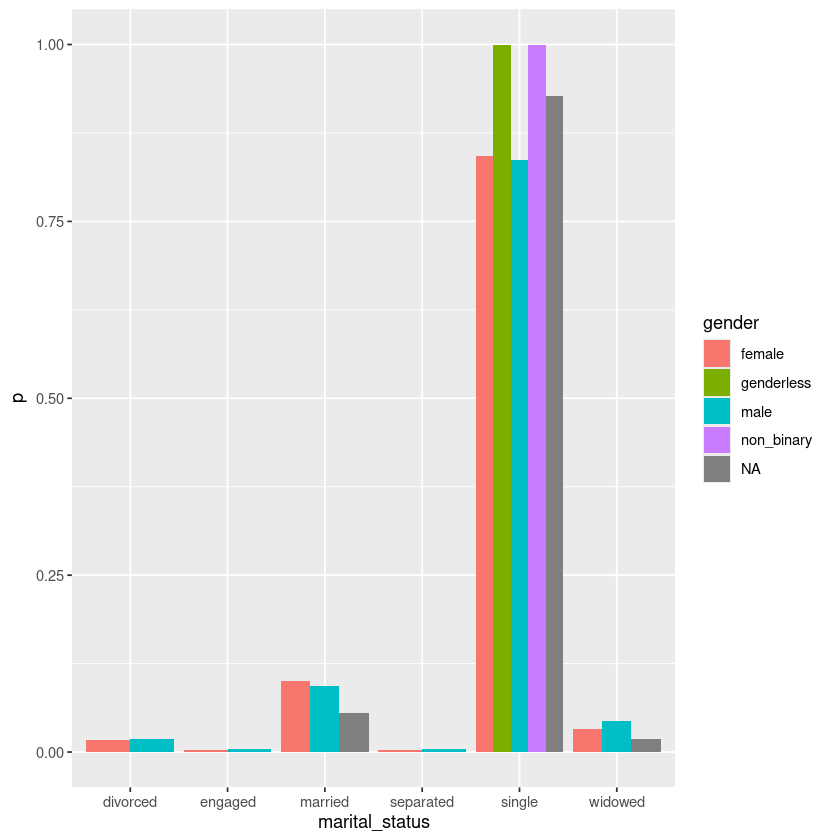

In [40]:
library(ggplot2); # note the 2

ggplot(status_probs, aes(marital_status, p)) +
    geom_bar(aes(fill=gender), stat="identity", position="dodge")


Already we can see how much easier this data is to consume. With just a
little more elbow grease we can have a pretty professional looking plot:

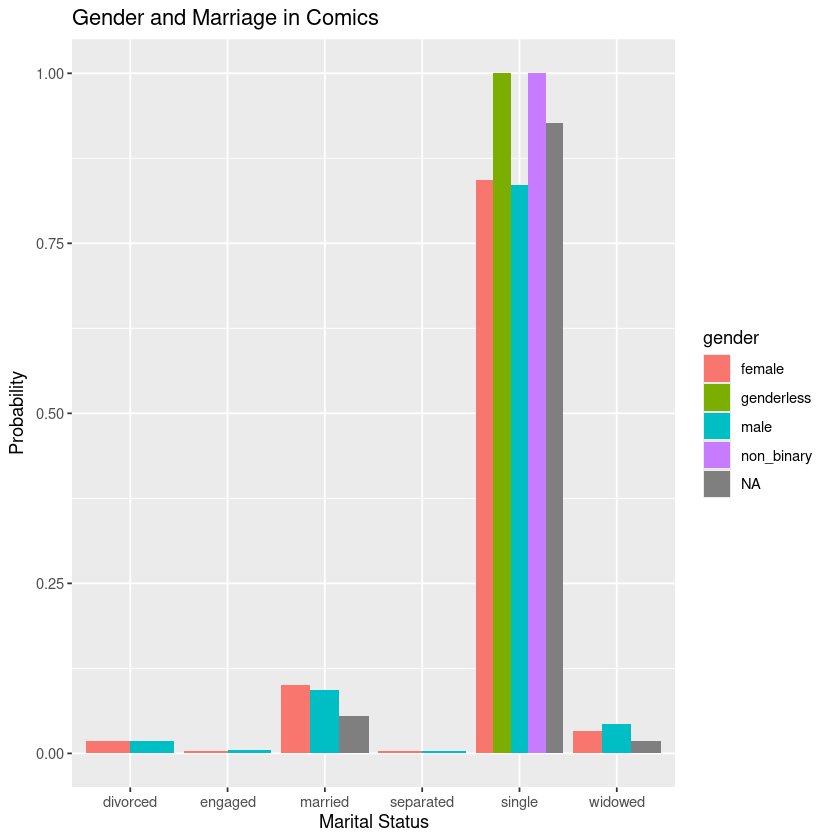

In [41]:
library(ggplot2); # note the 2

ggplot(status_probs, aes(marital_status, p)) +
    geom_bar(aes(fill=gender), stat="identity", position="dodge") +
    labs(x="Marital Status",y="Probability",title="Gender and Marriage in Comics");


So how does this work?

## ggplot concepts

ggplot works by letting you associate *data* with *aesthetics*. Data is
what you store in a data frame. An aesthetic is any sort of thing you
might use to distinguish objects visually.

The most trivial example:

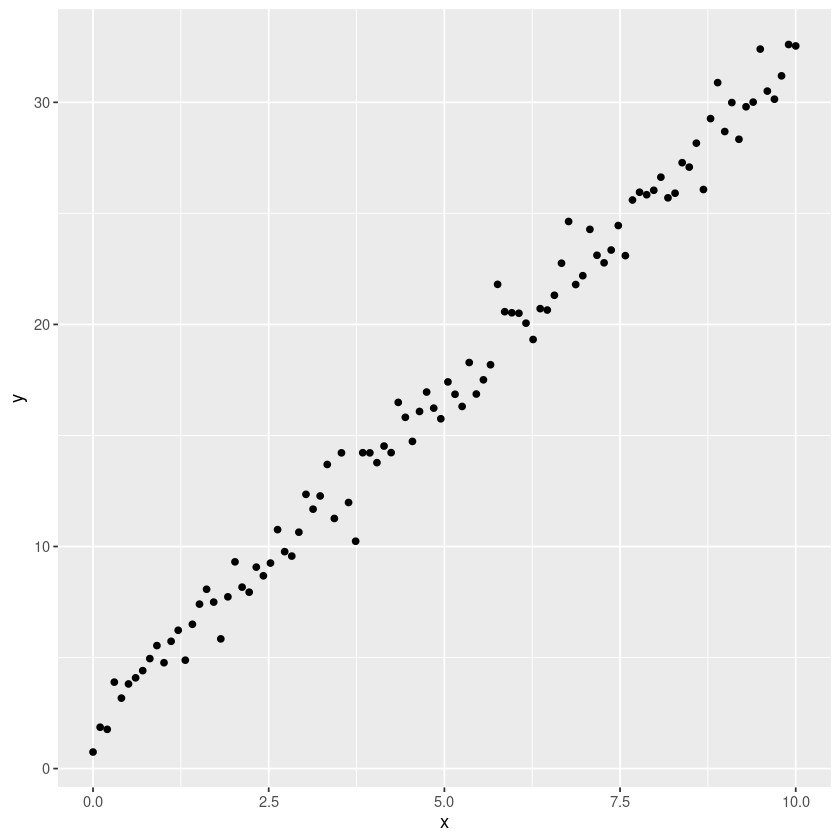

In [42]:
x <- seq(from=0,to=10,length.out=100);
df <- tibble(x=x, y=3*x + 2 + rnorm(length(x)))
ggplot(df,aes(x,y)) + geom_point();


Note that when we use grammar of graphics we don't think about *plot
types*. We think about *data* and *aesthetics* from which plot types
naturally derive.

What is the benefit of thinking this way?

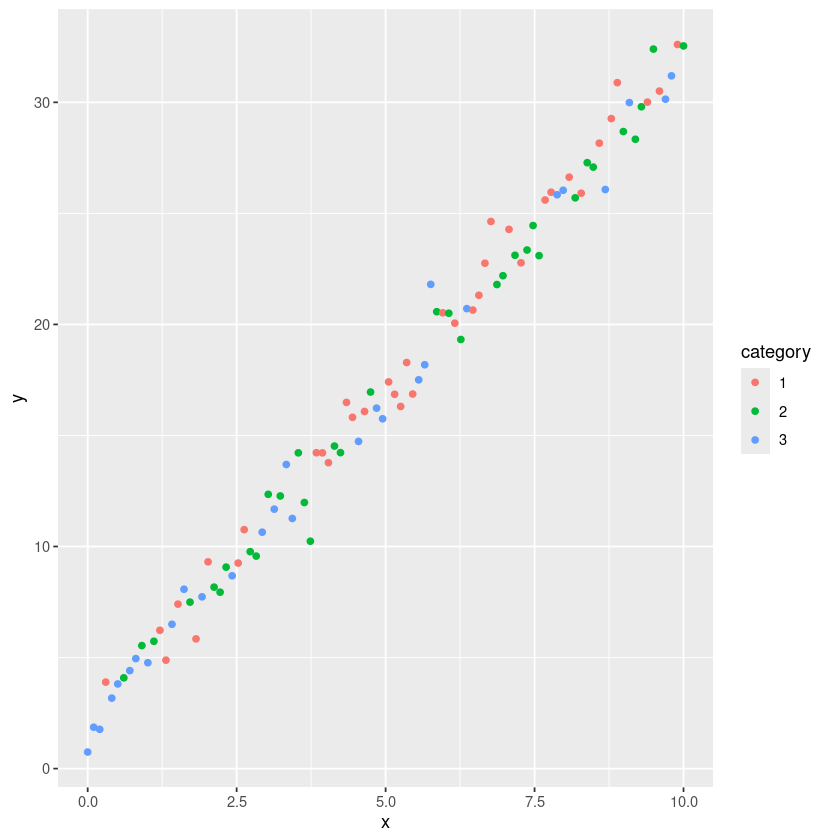

In [43]:
df$category <- sample(factor(c(1,2,3)),size=nrow(df),replace=T)
ggplot(df,aes(x,y)) + geom_point(aes(color=category));


Believe it or not the above example pretty much sums up how to use the
basic features of ggplot:

1.  figure out how you want to map your data to aesthetics
2.  figure out your geometry type
3.  use aes() to map additional aesthetics to your geometry.

Other things of note:

1.  because ggplot isn't strictly pipelining, we chain our ggplot
    functions with `+` rather than `%>%`.
2.  A bunch of meta-functions control things like axis labels, font
    size, etc. We'll need these to make some genuinely attractive plots.

But getting the hang of ggplot takes some work. Let's take a look at
some of the more common examples.

One nice thing is that the `histogram` geometry can do the counting for
you.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


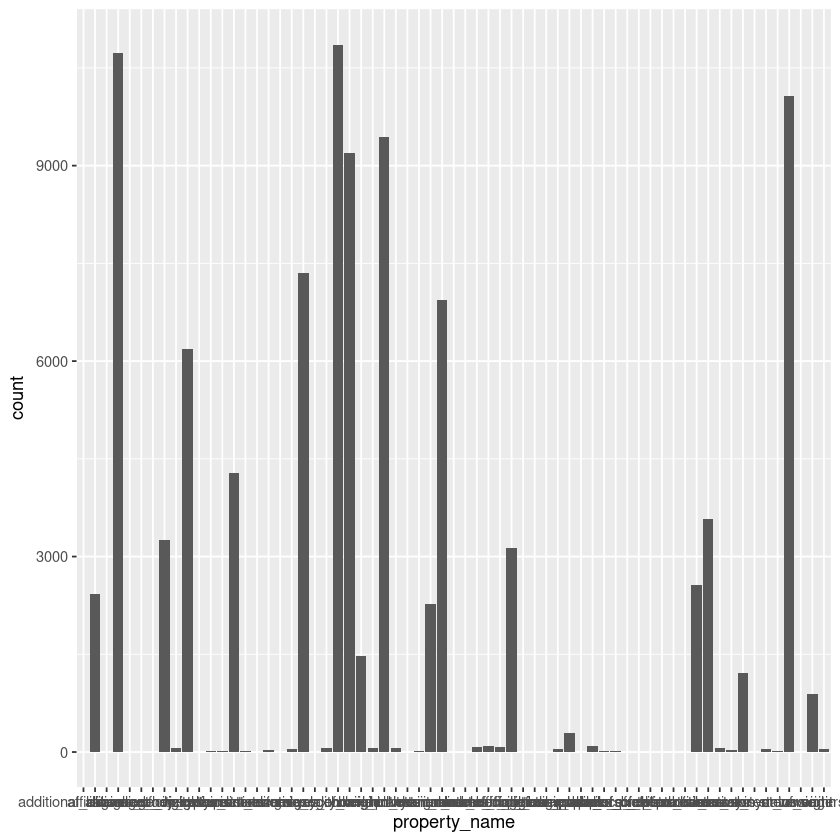

In [44]:
ggplot(tidied_data, aes(property_name)) + geom_histogram(stat="count");

Well, that is nice but its a far from ideal result. The x-axis labels
are unreadable. Let's fix that:

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


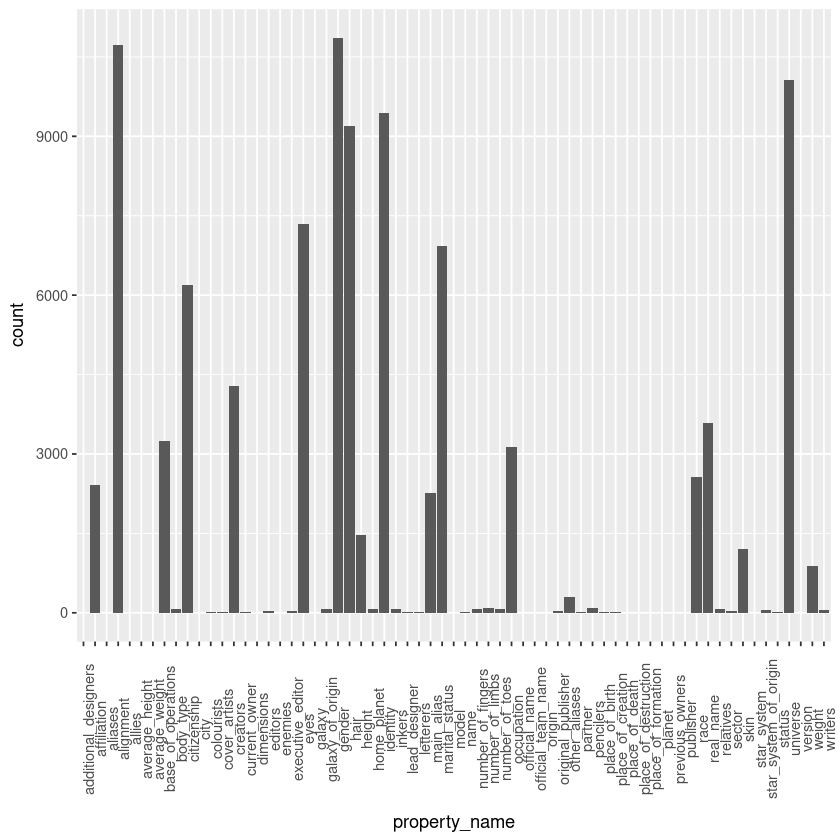

In [45]:
ggplot(tidied_data, aes(property_name)) +
    geom_histogram(stat="count") +
    theme(axis.text.x = element_text(angle = 90));

Note: I literally *always* google "ggplot rotate x label" for this.

This figure is still hard to read. Let's put the x axis in order by
count. To do this we need to appreciate factor variables.

Factors are what R uses when you some numerical or otherwise base data
but you want to highlight the fact that these are categorical and may
have an order. ggplot will respect the factor order if a column is a
factor variable, so lets coerce our property_name variable into a factor
based on total count.

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


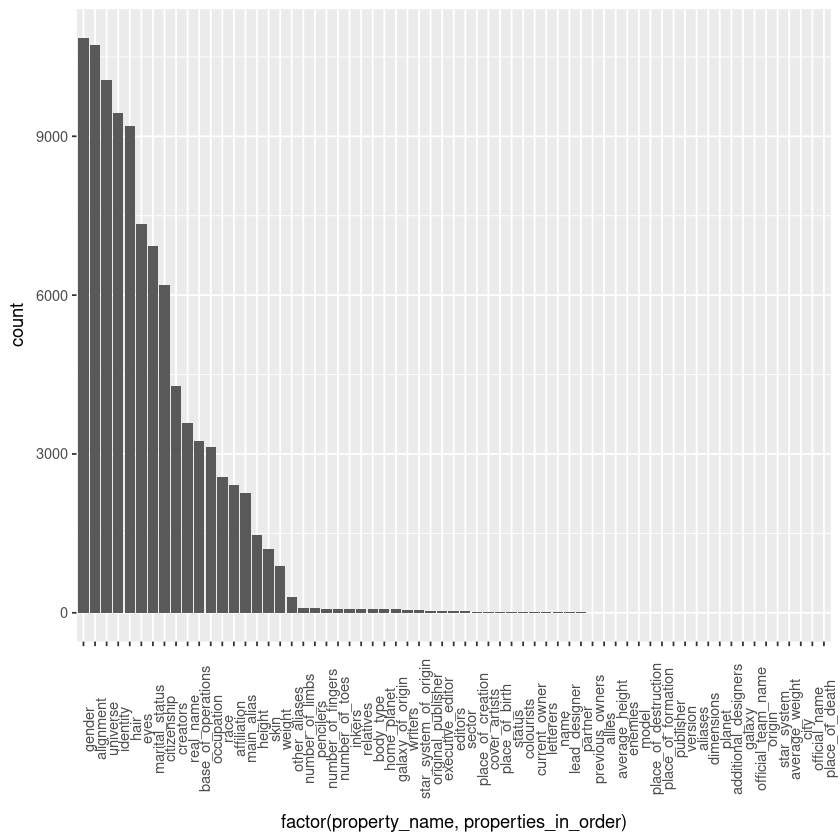

In [46]:
properties_in_order <- tidied_data %>% group_by(property_name) %>%
    tally() %>%
    arrange(desc(n),property_name) %>% `[[`("property_name");

ggplot(tidied_data, aes(factor(property_name,properties_in_order))) +
    geom_histogram(stat="count") +
    theme(axis.text.x = element_text(angle = 90));


Sorting the axes this way lets us get a nice sense for the data set. It
is sort of interesting that we have more information on the characters'
hair and eye colors than on their marital statuses.

Let's do a few scatter plots. First a sanity check. We should expect
that roughly the number of properties of a super hero and the page
length should correlate. Very roughly.

In [47]:
page_lengths <- read_csv("source_data/character-page-data.csv");
names(page_lengths) <- simplify_strings(names(page_lengths));
page_lengths <- page_lengths %>% mutate(across(character:universe, simplify_strings));
page_lengths

Rows: 11354 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): character, universe
dbl (1): page_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


character             universe                   page_length
1     abraham_dusk          wildstorm_universe         360879     
2     accelerated_man       earth_19                   361310     
3     ahn_kwang_jo          prime_earth                390275     
4     alec_holland          lego_batman                368585     
5     alec_holland          prime_earth                401822     
6     alexander_fairchild   wildstorm_universe         370234     
7     alexander_luthor      smallville                 440525     
8     alexander_staunton    prime_earth                359330     
9     alexander_trent       new_earth                  370103     
10    alonzo_malrey         new_earth                  353685     
11    alton_carver          prime_earth                361934     
12    andrew_pulaski        prime_earth                373190     
13    anissa_pierce         black_lightning_tv_series  363693     
14    antiope               tempest_tossed             383116     
15    apollo                wildstorm_universe         388501     
16    aquaman               arthur_curry               656008     
17    ares                  wonder_woman_2_9_movie     366030     
18    aristides_demetrios   new_earth                  371933     
19    artemis               wildstorm_universe         360833     
20    arthur_curry          dc_animated_movie_universe 417454     
21    asmodel               new_earth                  374850     
22    aten                  new_earth                  347429     
23    atropos               arrowverse                 368080     
24    august_heart          arrowverse                 365185     
25    august_heart          prime_earth                486705     
26    augustus_freeman      dakotaverse                400393     
27    auron                 new_earth                  367113     
28    avery_ho              future_state               368405     
29    balam                 prime_earth                352874     
30    bane                  dc_animated_movie_universe 371967     
⋮     ⋮                     ⋮                          ⋮          
11325 alfred_pennyworth     prime_earth                422234     
11326 barbara_gordon        dceased                    360478     
11327 bride                 flashpoint_timeline        351259     
11328 bride                 new_earth                  354733     
11329 bruce_wayne           blackest_day               365688     
11330 bruce_wayne           dceased                    368672     
11331 charles_chandler      dceased                    353543     
11332 cyrus_gold            batman_1966_tv_series      358801     
11333 cyrus_gold            dc_super_hero_girls        351475     
11334 cyrus_gold            dc_universe_online         358507     
11335 dale_jacobs           wildstorm_universe         351034     
11336 designer              prime_earth                365617     
11337 floyd_lawton          dceased                    360435     
11338 george_harkness       dceased                    349032     
11339 helena_bertinelli     dceased                    361053     
11340 jonathan_kent         dceased                    354711     
11341 katherine_kane        dceased                    360917     
11342 leonard_snart         dceased                    360328     
11343 lowell_tracey         izombie_tv_series          351085     
11344 mother_ii             prime_earth                352691     
11345 norris_mackenzie      wildstorm_universe         351734     
11346 oliver_queen          dceased                    364426     
11347 perry_white           dceased                    356291     
11348 richard_grayson       dceased                    364993     
11349 spawn_of_frankenstein new_earth                  355946     
11350 theodore_kord         dceased                    347566     
11351 timothy_drake         dceased                    360846     
11352 wild_bill_hickok      new_earth                

character          universe                      prop_count
1     5_chad             prime_earth                    8        
2     666                earth_22                       9        
3     7_gorn_7           teen_titans_tv_series          5        
4     a_1                prime_earth                    4        
5     a_calculus         prime_earth                    7        
6     a_hwiirdh_paan_a   new_earth                     12        
7     a_j                new_earth                      7        
8     a_k_fortesan       izombie_tv_series              8        
9     a_m_a_z_o          arrowverse                    10        
10    a_monn_a_mokk      new_earth                      9        
11    a_morr             new_earth                     10        
12    a_mortal           new_earth                     12        
13    a_train            the_boys                       9        
14    aagog              prime_earth                    6        
15    aalok              new_earth                      5        
16    aarl               pre_zero_hour                  6        
17    aaron_cash         prime_earth                    6        
18    aaron_helzinger    arrowverse                     9        
19    aaron_helzinger    new_earth                      9        
20    aaron_helzinger    prime_earth                   11        
21    aaron_langstrom    new_earth                     12        
22    abaddon            earth_s                        8        
23    abaddon            new_earth                     10        
24    abel               new_earth                      9        
25    abel               prime_earth                    7        
26    abel_cuvier        dcau                           6        
27    abel_tarrant       green_lantern_animated_series  9        
28    abel_tarrant       new_earth                     11        
29    abel_tarrant       prime_earth                   11        
30    aberration         new_earth                      4        
⋮     ⋮                  ⋮                             ⋮         
11279 zombie_master_ii   earth_s                        7        
11280 zombie_zeke        wildstorm_universe             6        
11281 zombies            zombie                         9        
11282 zond               earth_one                      8        
11283 zone_child         new_earth                     11        
11284 zonuz              prime_earth                    7        
11285 zook               new_earth                      8        
11286 zor_el             earth_one                      9        
11287 zor_el             new_earth                      9        
11288 zor_el             prime_earth                   10        
11289 zor_el             scooby_doo_team_up            11        
11290 zor_el             smallville                     9        
11291 zor_el             unbound                        7        
11292 zora_vi_lar        earth_5_8                     10        
11293 zorgul             just_imagine                   7        
11294 zoro               earth_s                        8        
11295 zorrm              new_earth                      4        
11296 zot                prime_earth                    8        
11297 zou_kang           new_earth                      8        
11298 zuggernaut         new_earth                     10        
11299 zulian_maletarians zulian_maletarian              7        
11300 zuma               prime_earth                   11        
11301 zumbado            prime_earth                    5        
11302 zushan             prime_earth                    6        
11303 zviad_baazovi      earth_16                       7        
11304 zyklon             new_earth                      7        
11305 zymyr              pre_zero_hour                 11        
11306 zyn                new_earth                      8        
11307 zypto              earth_one            

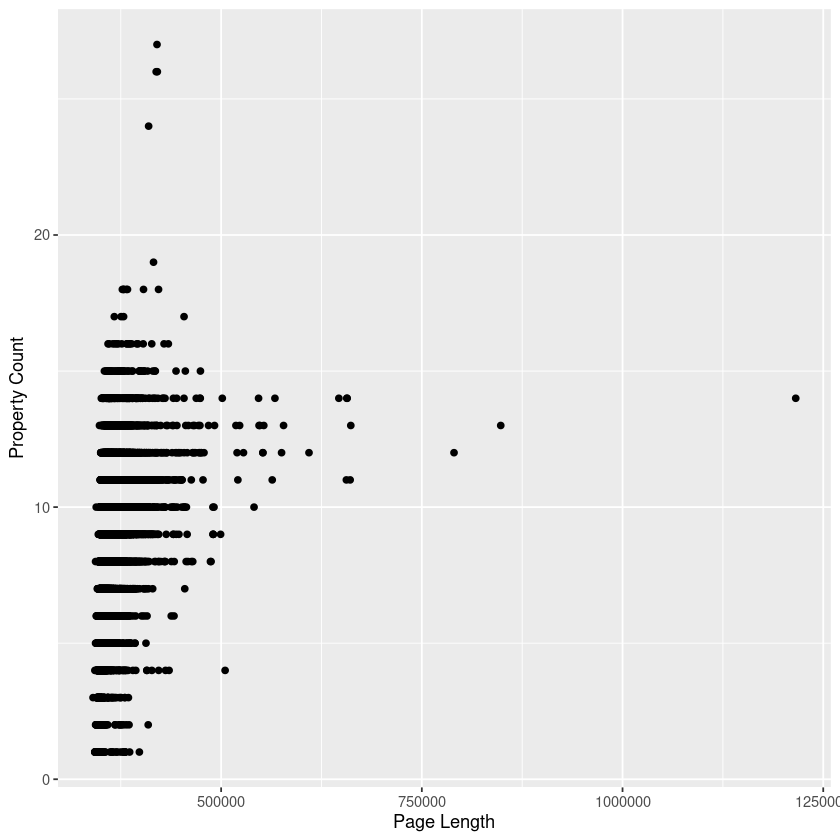

In [48]:
property_counts <- tidied_data %>% group_by(character, universe) %>% tally(name="prop_count")
property_counts

df <- property_counts %>% inner_join(page_lengths, by=c("character","universe"));
ggplot(df,aes(page_length, prop_count)) + geom_point() + labs(x="Page Length",y="Property Count");

How does this data interact with gender? Let's pull out the gender data
and join it to our data set.

character             universe                   gender
1     abraham_dusk          wildstorm_universe         male  
2     accelerated_man       earth_19                   male  
3     ahn_kwang_jo          prime_earth                male  
4     alec_holland          lego_batman                male  
5     alec_holland          prime_earth                male  
6     alexander_fairchild   wildstorm_universe         male  
7     alexander_luthor      smallville                 male  
8     alexander_staunton    prime_earth                male  
9     alexander_trent       new_earth                  male  
10    alonzo_malrey         new_earth                  male  
11    alton_carver          prime_earth                male  
12    andrew_pulaski        prime_earth                male  
13    anissa_pierce         black_lightning_tv_series  female
14    antiope               tempest_tossed             female
15    apollo                wildstorm_universe         male  
16    aquaman               arthur_curry               male  
17    ares                  wonder_woman_2_9_movie     male  
18    aristides_demetrios   new_earth                  male  
19    artemis               wildstorm_universe         female
20    arthur_curry          dc_animated_movie_universe male  
21    asmodel               new_earth                  male  
22    aten                  new_earth                  male  
23    atropos               arrowverse                 female
24    august_heart          arrowverse                 male  
25    august_heart          prime_earth                male  
26    augustus_freeman      dakotaverse                male  
27    auron                 new_earth                  male  
28    avery_ho              future_state               female
29    balam                 prime_earth                male  
30    bane                  dc_animated_movie_universe male  
⋮     ⋮                     ⋮                          ⋮     
10830 weatherman_ii         earth_s                    male  
10831 alfred_pennyworth     prime_earth                male  
10832 barbara_gordon        dceased                    female
10833 bride                 flashpoint_timeline        female
10834 bride                 new_earth                  female
10835 bruce_wayne           blackest_day               male  
10836 bruce_wayne           dceased                    male  
10837 cyrus_gold            batman_1966_tv_series      male  
10838 cyrus_gold            dc_super_hero_girls        male  
10839 cyrus_gold            dc_universe_online         male  
10840 dale_jacobs           wildstorm_universe         male  
10841 designer              prime_earth                male  
10842 floyd_lawton          dceased                    male  
10843 george_harkness       dceased                    male  
10844 helena_bertinelli     dceased                    female
10845 jonathan_kent         dceased                    male  
10846 katherine_kane        dceased                    female
10847 leonard_snart         dceased                    male  
10848 lowell_tracey         izombie_tv_series          male  
10849 mother_ii             prime_earth                female
10850 norris_mackenzie      wildstorm_universe         male  
10851 oliver_queen          dceased                    male  
10852 perry_white           dceased                    male  
10853 richard_grayson       dceased                    male  
10854 spawn_of_frankenstein new_earth                  male  
10855 theodore_kord         dceased                    male  
10856 timothy_drake         dceased                    male  
10857 wild_bill_hickok      new_earth                  male  
10858 zombie_master_ii      earth_s                    male  
10859 zombie_zeke           wildstorm_universe         male

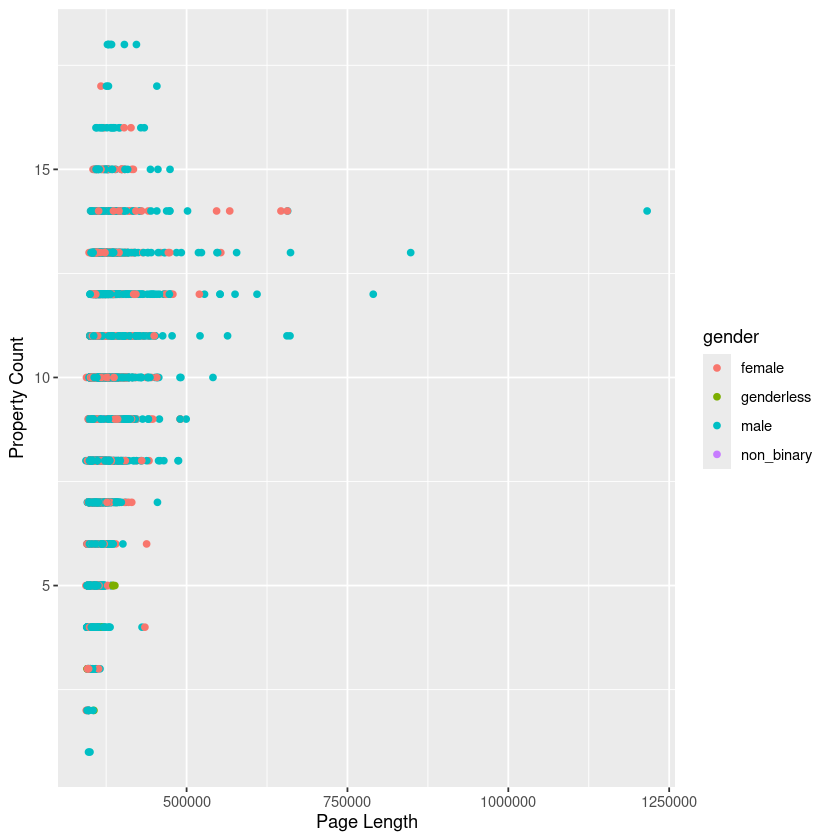

In [49]:
gender_data <- tidied_data %>% filter(property_name=="gender") %>%
    rename(gender=value) %>%
    select(-property_name);
gender_data

df <- property_counts %>% inner_join(page_lengths, by=c("character","universe")) %>%
    inner_join(gender_data, by=c("character","universe"));

ggplot(df,aes(page_length, prop_count)) + geom_point(aes(color=gender)) + labs(x="Page Length",y="Property Count");


We see here a pretty common problem with scatter plots: when the points
lie on top of one another its hard to see what is going on. We can take
a few approaches to solving this. Here is a quick and dirty one:

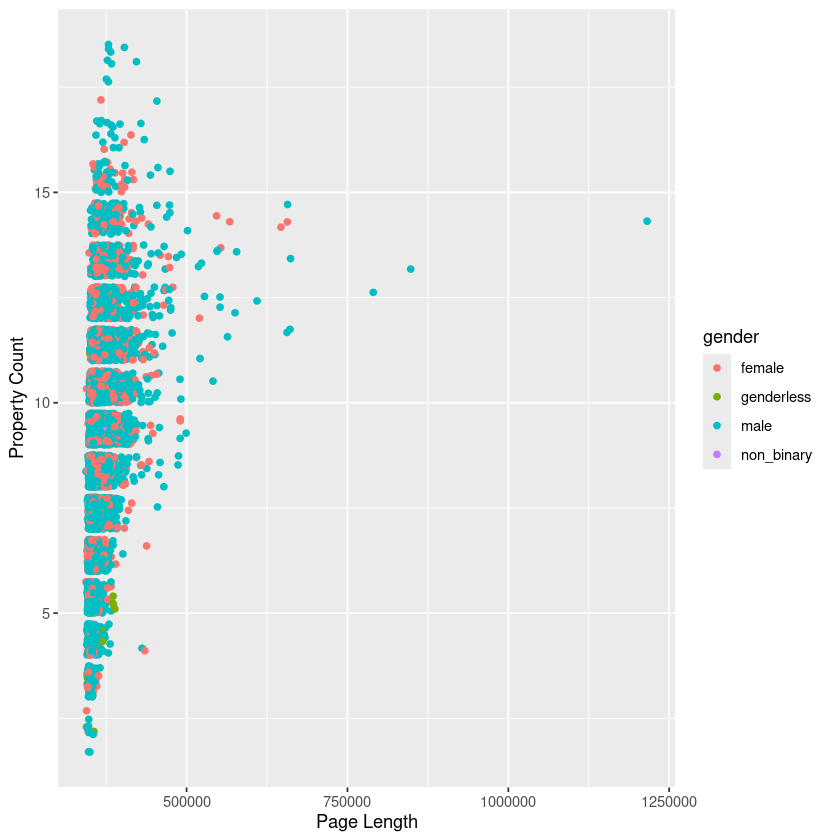

In [50]:
ggplot(df,aes(page_length, prop_count + 0.75*runif(nrow(df)))) +
    geom_point(aes(color=gender)) +
    labs(x="Page Length",y="Property Count");


Still sort of bad:

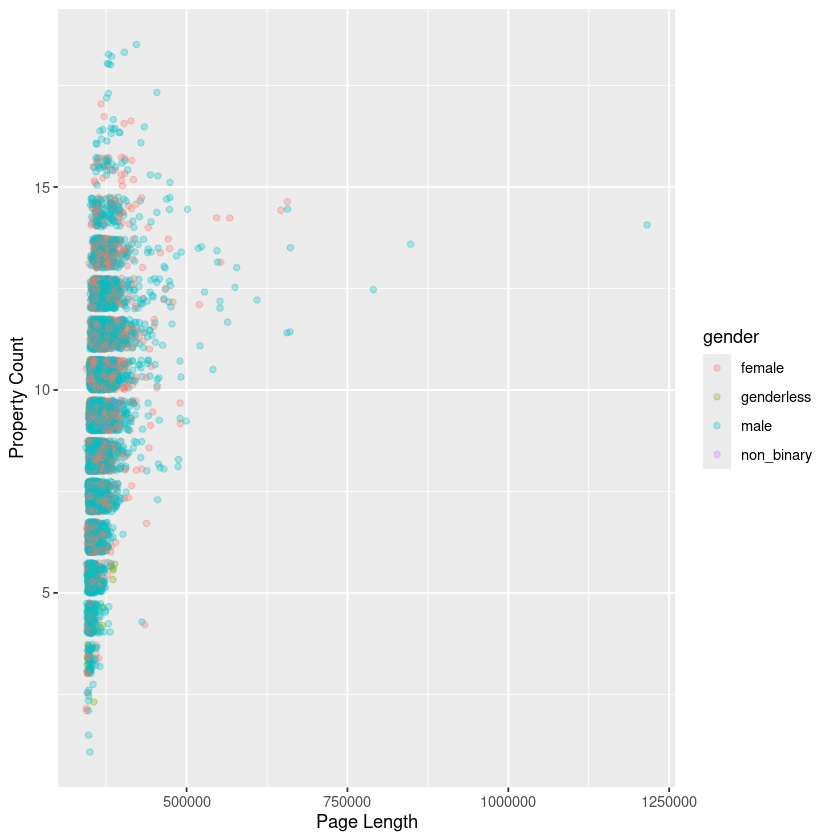

In [51]:
ggplot(df,aes(page_length, prop_count + 0.75*runif(nrow(df)))) +
    geom_point(aes(color=gender),alpha=0.3) +
    labs(x="Page Length",y="Property Count");


This might call for a box plot.

Warning message:
“Removed 27 rows containing non-finite outside the scale range (`stat_boxplot()`).”


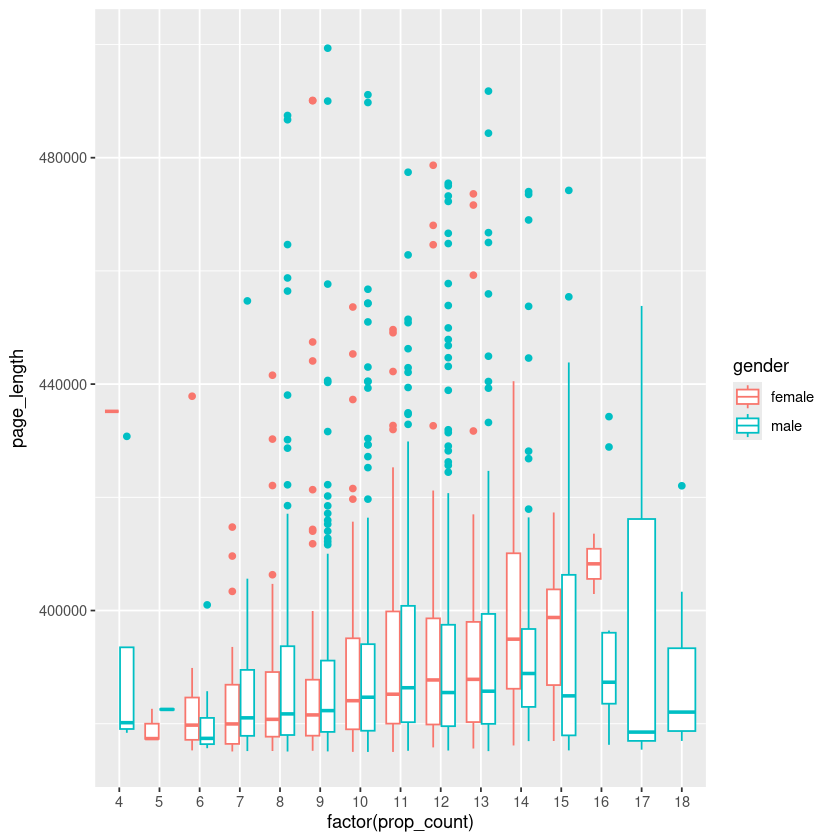

In [52]:

ggplot(df %>% filter(page_length > 3.75e5) %>% filter(gender %in% c("male","female")), aes(factor(prop_count),page_length)) +
    geom_boxplot(aes(color=gender)) + ylim(3.75e5,500000);


Looking at this data tells us a few things.

1.  There is a trend for female-coded characters have shorter pages.
2.  The data is very not-normal, probably reflecting some missing
    componenets in our understanding of the data.

Let's take a look at just that question using a density plot.

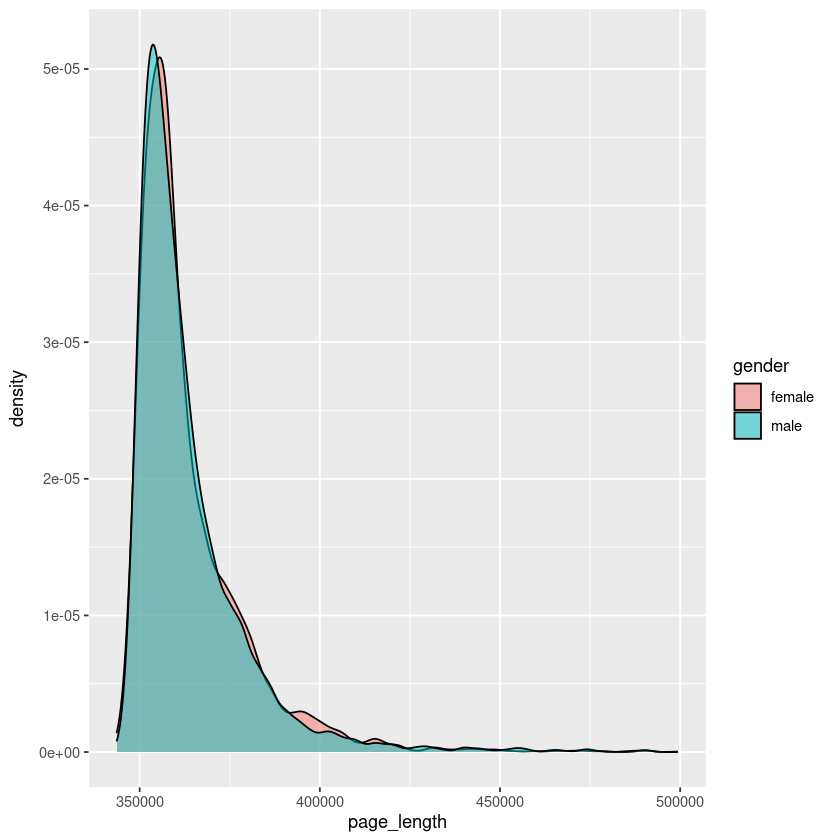

In [53]:
ggplot(df %>%
       filter(page_length < 500000 & gender %in% c("male",
                                                   "female")),
       aes(page_length)) + geom_density(aes(fill=gender),
                                        alpha=0.5);

Not all that enlightening.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


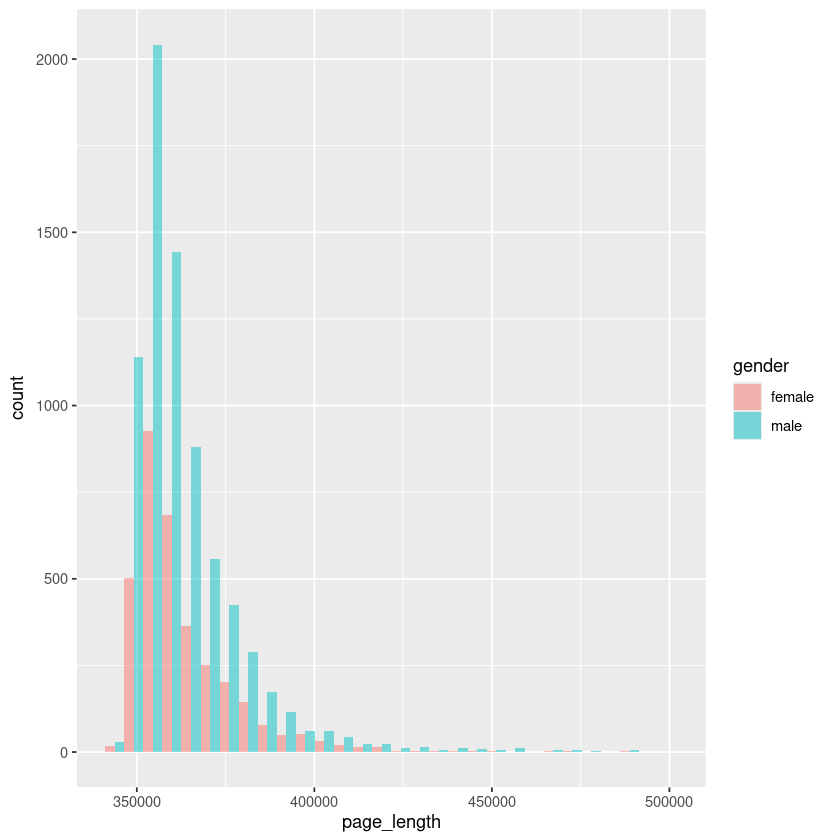

In [54]:
ggplot(df %>%
       filter(page_length < 500000 & gender %in% c("male",
                                                   "female")),
       aes(page_length)) + geom_histogram(aes(fill=gender),
                                          alpha=0.5,
                                          position="dodge");

Still not all that enlightening! Probably going to dig into this.

Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


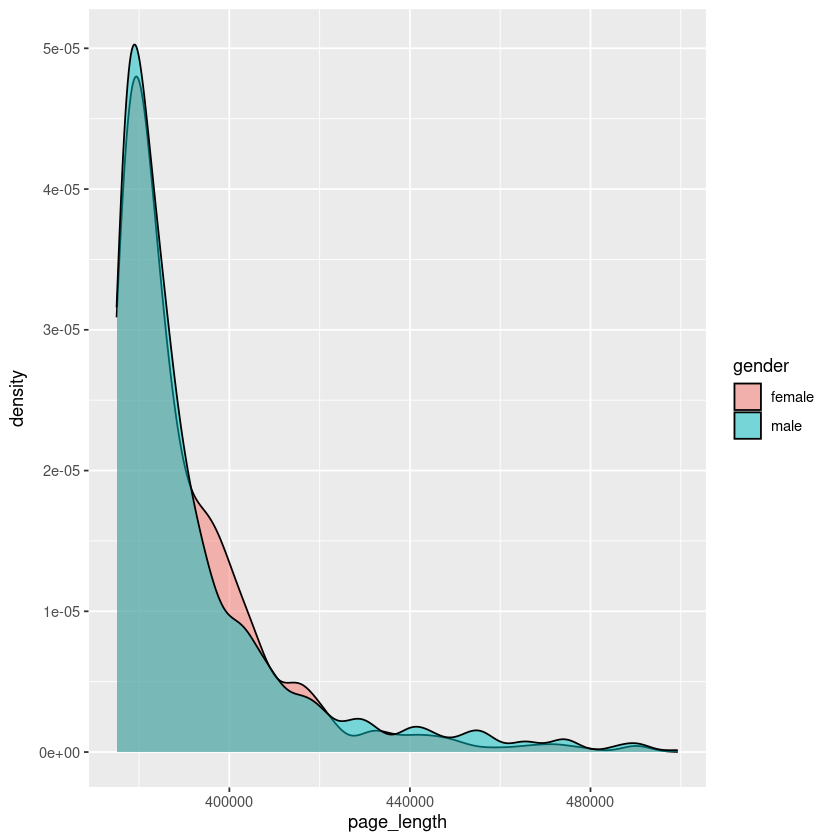

In [55]:
ggplot(df %>%
       filter(page_length < 500000 & page_length > 375000 & gender %in% c("male",
                                                                          "female")),
       aes(page_length)) + geom_density(aes(fill=gender),
                                        alpha=0.5,
                                        position="dodge");

## GGPlot Geometries

GGPlot will pretty much let you do anything. You just need to find the
right geometry.

1.  geom_point - points
2.  geom_histogram - histogram, performs aggregation itself (geom_bar +
    stat bin)
3.  geom_density - density plot (using a kernel density estimate)
4.  geom_boxplot - boxplot (plots centroids and widths w/ outliers)
5.  geom_rect - general rectangles
6.  geom_bar - bar graph can perform all sorts of aggregations
7.  Many others

Aesthetics (not all aesthetics apply to all geometries)

1.  color - the color of a point or shape or the color of the boundary
    of a polygon or rectangle.
2.  fill - the color of the interior of a polygon or rectangle
3.  alpha - the transparency of a color
4.  position - for histograms and bar plots how to position boxes for
    the same x aesthetic. "dodge" is the most clear.

## Non-trivial Example

Let's try to appreciate whether powers are distributed difference
between male and female characters. This is a figure which will be
merely suggestive rather than statistically meaningful. We will examine
*rank* rather than difference.

In [56]:
powers <- read_csv("source_data/powers.csv");
powers <- powers %>% mutate(across(power:universe, simplify_strings)) %>%
    distinct();

powers_gender <- powers %>% inner_join(gender_data, by=c("character", "universe")) %>%
    select(-url) %>%
    filter(gender %in% c("male","female"));
powers_gender


Rows: 52663 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): power, character, universe, url

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


power               character             universe                  
1     accelerated_healing abraham_dusk          wildstorm_universe        
2     accelerated_healing accelerated_man       earth_19                  
3     accelerated_healing ahn_kwang_jo          prime_earth               
4     accelerated_healing alec_holland          lego_batman               
5     accelerated_healing alec_holland          prime_earth               
6     accelerated_healing alexander_fairchild   wildstorm_universe        
7     accelerated_healing alexander_luthor      smallville                
8     accelerated_healing alexander_staunton    prime_earth               
9     accelerated_healing alexander_trent       new_earth                 
10    accelerated_healing alonzo_malrey         new_earth                 
11    accelerated_healing alton_carver          prime_earth               
12    accelerated_healing andrew_pulaski        prime_earth               
13    accelerated_healing anissa_pierce         black_lightning_tv_series 
14    accelerated_healing antiope               tempest_tossed            
15    accelerated_healing apollo                wildstorm_universe        
16    accelerated_healing aquaman               arthur_curry              
17    accelerated_healing ares                  wonder_woman_2_9_movie    
18    accelerated_healing aristides_demetrios   new_earth                 
19    accelerated_healing artemis               wildstorm_universe        
20    accelerated_healing arthur_curry          dc_animated_movie_universe
21    accelerated_healing asmodel               new_earth                 
22    accelerated_healing aten                  new_earth                 
23    accelerated_healing atropos               arrowverse                
24    accelerated_healing august_heart          arrowverse                
25    accelerated_healing august_heart          prime_earth               
26    accelerated_healing augustus_freeman      dakotaverse               
27    accelerated_healing auron                 new_earth                 
28    accelerated_healing avery_ho              future_state              
29    accelerated_healing balam                 prime_earth               
30    accelerated_healing bane                  dc_animated_movie_universe
⋮     ⋮                   ⋮                     ⋮                         
50316 zombie_physiology   richard_grayson       dceased                   
50317 zombie_physiology   rita                  izombie_tv_series         
50318 zombie_physiology   russ_roche            izombie_tv_series         
50319 zombie_physiology   sebastian_meyer       izombie_tv_series         
50320 zombie_physiology   selina_kyle           dceased                   
50321 zombie_physiology   simon_dark            new_earth                 
50322 zombie_physiology   solomon_grundy        earth_22                  
50323 zombie_physiology   solomon_grundy        earth_one                 
50324 zombie_physiology   solomon_grundy        super_best_friends_forever
50325 zombie_physiology   solomon_grundy        super_friends             
50326 zombie_physiology   solomon_grundy        the_batman_tv_series      
50327 zombie_physiology   solomon_grundy        the_brave_and_the_bold    
50328 zombie_physiology   solomon_grundy        tiny_titans               
50329 zombie_physiology   solomon_grundy_clone  prime_earth               
50330 zombie_physiology   spawn_of_frankenstein new_earth                 
50331 zombie_physiology   suzuki                izombie_tv_series         
50332 zombie_physiology   tanner                izombie_tv_series         
50333 zombie_physiology   teth_adam             dceased                   
50334 zombie_physiology   theodore_kord         dceased                   
50335 zombie_physiology   thomas_kirk           new_earth                 
50336 zombie_physiology   timothy_drake         dceased                   
50337 zombie_physiology   tora_

We want to calculate for each power `P(power|gender)`.

In [57]:
gender_counts <- gender_data %>% group_by(gender) %>% tally(name="total");
probs <- powers_gender %>%
    inner_join(gender_counts, by="gender") %>%
    group_by(power, gender, total)  %>% 
    summarize(p=length(character)/total[[1]]) %>%
    arrange(gender,desc(p)) %>%
    group_by(gender) %>%
    mutate(rank=seq(length(p))) %>%
    ungroup();
probs

`summarise()` has grouped output by 'power', 'gender'. You can override using the `.groups` argument.


power                    gender total p            rank
1   superhuman_strength      female 3378  0.38069864    1  
2   flight                   female 3378  0.26287744    2  
3   superhuman_durability    female 3378  0.25162818    3  
4   superhuman_stamina       female 3378  0.22853760    4  
5   superhuman_agility       female 3378  0.18679692    5  
6   immortality              female 3378  0.17436353    6  
7   superhuman_speed         female 3378  0.15896980    7  
8   divine_empowerment       female 3378  0.12107756    8  
9   superhuman_reflexes      female 3378  0.11071640    9  
10  energy_projection        female 3378  0.10420367   10  
11  unique_physiology        female 3378  0.10420367   11  
12  magic                    female 3378  0.10331557   12  
13  enhanced_vision          female 3378  0.10242747   13  
14  enhanced_intellect       female 3378  0.09088218   14  
15  telepathy                female 3378  0.08525755   15  
16  self_sustenance          female 3378  0.08140912   16  
17  invulnerability          female 3378  0.07696862   17  
18  enhanced_hearing         female 3378  0.07578449   18  
19  energy_absorption        female 3378  0.07282416   19  
20  metamorphosis            female 3378  0.06986382   20  
21  thermal_blast            female 3378  0.06571936   21  
22  decelerated_aging        female 3378  0.06305506   22  
23  enhanced_senses          female 3378  0.06157490   23  
24  claws                    female 3378  0.05358200   24  
25  teleportation            female 3378  0.05358200   25  
26  alien_physiology         female 3378  0.05032564   26  
27  transformation           female 3378  0.04677324   27  
28  telekinesis              female 3378  0.04410894   28  
29  super_breath             female 3378  0.04174067   29  
30  size_alteration          female 3378  0.04026051   30  
⋮   ⋮                        ⋮      ⋮     ⋮            ⋮   
247 animal_mimicry           male   7392  0.0041937229 110 
248 molecular_acceleration   male   7392  0.0040584416 111 
249 lycanthropy              male   7392  0.0039231602 112 
250 adhesion                 male   7392  0.0037878788 113 
251 omniscience              male   7392  0.0033820346 114 
252 cheating_death           male   7392  0.0031114719 115 
253 matter_absorption        male   7392  0.0031114719 116 
254 therianthropy            male   7392  0.0031114719 117 
255 removable_limbs          male   7392  0.0029761905 118 
256 talons                   male   7392  0.0029761905 119 
257 deflection               male   7392  0.0028409091 120 
258 probability_manipulation male   7392  0.0028409091 121 
259 omnipresence             male   7392  0.0025703463 122 
260 exorcism                 male   7392  0.0020292208 123 
261 necrotic_empowerment     male   7392  0.0020292208 124 
262 body_art_animation       male   7392  0.0017586580 125 
263 pheromone_control        male   7392  0.0017586580 126 
264 ectokinesis              male   7392  0.0013528139 127 
265 symbiosis                male   7392  0.0013528139 128 
266 chi_manipulation         male   7392  0.0012175325 129 
267 balance_manipulation     male   7392  0.0009469697 130 
268 crystal_generation       male   7392  0.0006764069 131 
269 elemental_transmutation  male   7392  0.0006764069 132 
270 oneiromancy              male   7392  0.0005411255 133 
271 prehensile_hair          male   7392  0.0005411255 134 
272 antipathy                male   7392  0.0004058442 135 
273 chemical_catalysis       male   7392  0.0004058442 136 
274 discern_motivation       male   7392  0.0002705628 137 
275 eidetic_kinesthesia      male   7392  0.0001352814 138 
276 superhuman_endurance     male   7392  0.0001352814 139

In [58]:
probs %>% filter(gender=="male")

power                    gender total p            rank
1   superhuman_strength      male   7392  0.41504329    1  
2   flight                   male   7392  0.24485931    2  
3   superhuman_durability    male   7392  0.23160173    3  
4   superhuman_stamina       male   7392  0.19020563    4  
5   superhuman_speed         male   7392  0.18492965    5  
6   unique_physiology        male   7392  0.15868506    6  
7   energy_projection        male   7392  0.12770563    7  
8   invulnerability          male   7392  0.12675866    8  
9   superhuman_reflexes      male   7392  0.11728896    9  
10  superhuman_agility       male   7392  0.11661255   10  
11  enhanced_vision          male   7392  0.11580087   11  
12  immortality              male   7392  0.10673701   12  
13  energy_absorption        male   7392  0.08996212   13  
14  telepathy                male   7392  0.08482143   14  
15  magic                    male   7392  0.08455087   15  
16  thermal_blast            male   7392  0.08455087   16  
17  enhanced_hearing         male   7392  0.08346861   17  
18  metamorphosis            male   7392  0.07251082   18  
19  enhanced_senses          male   7392  0.07237554   19  
20  decelerated_aging        male   7392  0.06845238   20  
21  transformation           male   7392  0.06574675   21  
22  alien_physiology         male   7392  0.06250000   22  
23  claws                    male   7392  0.05952381   23  
24  accelerated_healing      male   7392  0.05614177   24  
25  teleportation            male   7392  0.05438312   25  
26  phasing                  male   7392  0.05397727   26  
27  size_alteration          male   7392  0.05316558   27  
28  super_breath             male   7392  0.05262446   28  
29  force_field              male   7392  0.05100108   29  
30  regeneration             male   7392  0.05100108   30  
⋮   ⋮                        ⋮      ⋮     ⋮            ⋮   
110 animal_mimicry           male   7392  0.0041937229 110 
111 molecular_acceleration   male   7392  0.0040584416 111 
112 lycanthropy              male   7392  0.0039231602 112 
113 adhesion                 male   7392  0.0037878788 113 
114 omniscience              male   7392  0.0033820346 114 
115 cheating_death           male   7392  0.0031114719 115 
116 matter_absorption        male   7392  0.0031114719 116 
117 therianthropy            male   7392  0.0031114719 117 
118 removable_limbs          male   7392  0.0029761905 118 
119 talons                   male   7392  0.0029761905 119 
120 deflection               male   7392  0.0028409091 120 
121 probability_manipulation male   7392  0.0028409091 121 
122 omnipresence             male   7392  0.0025703463 122 
123 exorcism                 male   7392  0.0020292208 123 
124 necrotic_empowerment     male   7392  0.0020292208 124 
125 body_art_animation       male   7392  0.0017586580 125 
126 pheromone_control        male   7392  0.0017586580 126 
127 ectokinesis              male   7392  0.0013528139 127 
128 symbiosis                male   7392  0.0013528139 128 
129 chi_manipulation         male   7392  0.0012175325 129 
130 balance_manipulation     male   7392  0.0009469697 130 
131 crystal_generation       male   7392  0.0006764069 131 
132 elemental_transmutation  male   7392  0.0006764069 132 
133 oneiromancy              male   7392  0.0005411255 133 
134 prehensile_hair          male   7392  0.0005411255 134 
135 antipathy                male   7392  0.0004058442 135 
136 chemical_catalysis       male   7392  0.0004058442 136 
137 discern_motivation       male   7392  0.0002705628 137 
138 eidetic_kinesthesia      male   7392  0.0001352814 138 
139 superhuman_endurance     male   7392  0.0001352814 139

Let's just keep the first 20 powers.

In [59]:
ranked_gendered <- probs %>% filter(rank<=20) %>% select(-p,-total);
ranked_gendered

power_order <- ranked_gendered %>% group_by(power) %>% summarize(mr = mean(rank)) %>%
    arrange(mr) %>% `[[`("power")

ranked_gendered$power <- factor(ranked_gendered$power,power_order);


power                 gender rank
1  superhuman_strength   female  1  
2  flight                female  2  
3  superhuman_durability female  3  
4  superhuman_stamina    female  4  
5  superhuman_agility    female  5  
6  immortality           female  6  
7  superhuman_speed      female  7  
8  divine_empowerment    female  8  
9  superhuman_reflexes   female  9  
10 energy_projection     female 10  
11 unique_physiology     female 11  
12 magic                 female 12  
13 enhanced_vision       female 13  
14 enhanced_intellect    female 14  
15 telepathy             female 15  
16 self_sustenance       female 16  
17 invulnerability       female 17  
18 enhanced_hearing      female 18  
19 energy_absorption     female 19  
20 metamorphosis         female 20  
21 superhuman_strength   male    1  
22 flight                male    2  
23 superhuman_durability male    3  
24 superhuman_stamina    male    4  
25 superhuman_speed      male    5  
26 unique_physiology     male    6  
27 energy_projection     male    7  
28 invulnerability       male    8  
29 superhuman_reflexes   male    9  
30 superhuman_agility    male   10  
31 enhanced_vision       male   11  
32 immortality           male   12  
33 energy_absorption     male   13  
34 telepathy             male   14  
35 magic                 male   15  
36 thermal_blast         male   16  
37 enhanced_hearing      male   17  
38 metamorphosis         male   18  
39 enhanced_senses       male   19  
40 decelerated_aging     male   20

We want a totally custom plot here. On the left we want to have the
female powers and the male powers on the right.

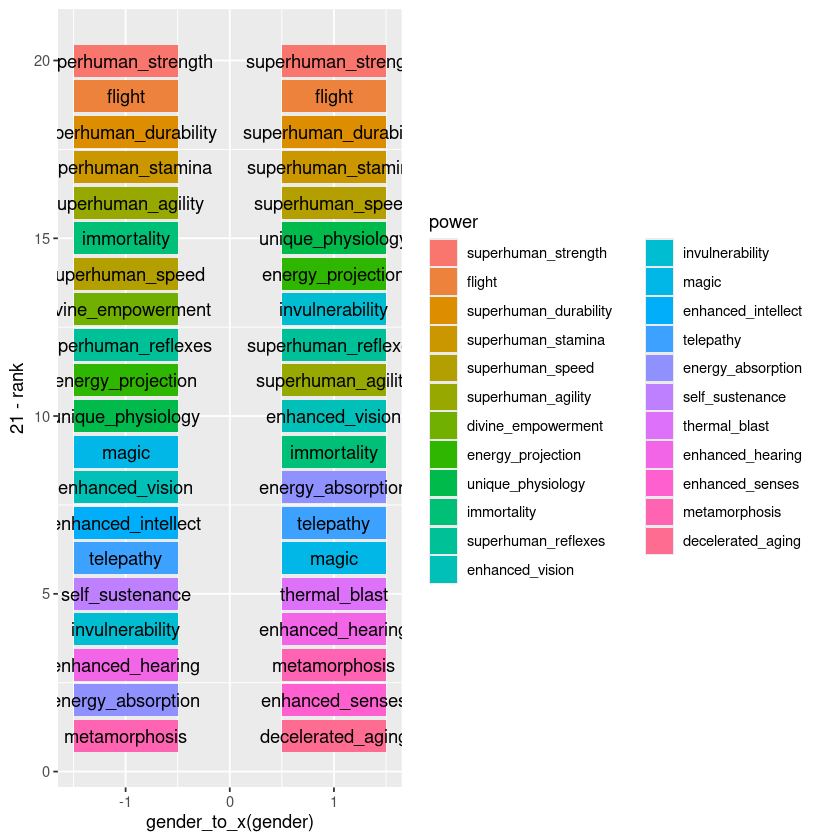

In [60]:
gender_to_x <- function(g){
    x=c("male"=1,"female"=-1)
    x[g];
}

ggplot(ranked_gendered) +
    geom_rect(aes(xmin=gender_to_x(gender)-0.5,
              xmax=gender_to_x(gender)+0.5,
              ymin=21-rank-0.45,
              ymax=21-rank+0.45,
              fill=power)) +
    geom_text(aes(x=gender_to_x(gender),
                  y=21-rank,
                  label=power));

This is nice but lets put a litlte more polish on this and add lines
connecting the same power on each side. This will require massaging our
data a little.

In [61]:
male <- ranked_gendered %>% filter(gender=="male") %>%
    rename(male_rank=rank);
female <- ranked_gendered %>% filter(gender=="female") %>%
    rename(female_rank=rank);

line_data_male <- male %>% left_join(female, by="power") %>%
    select(-gender.x, -gender.y);
line_data_female <- male %>% right_join(female, by="power") %>%
    select(-gender.x, -gender.y);

line_data <- rbind(line_data_male, line_data_female) %>% distinct() %>%
    mutate(male_rank=replace_na(male_rank,21),
           female_rank=replace_na(female_rank,21));



Note that we can use multiple data sets per plot:

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


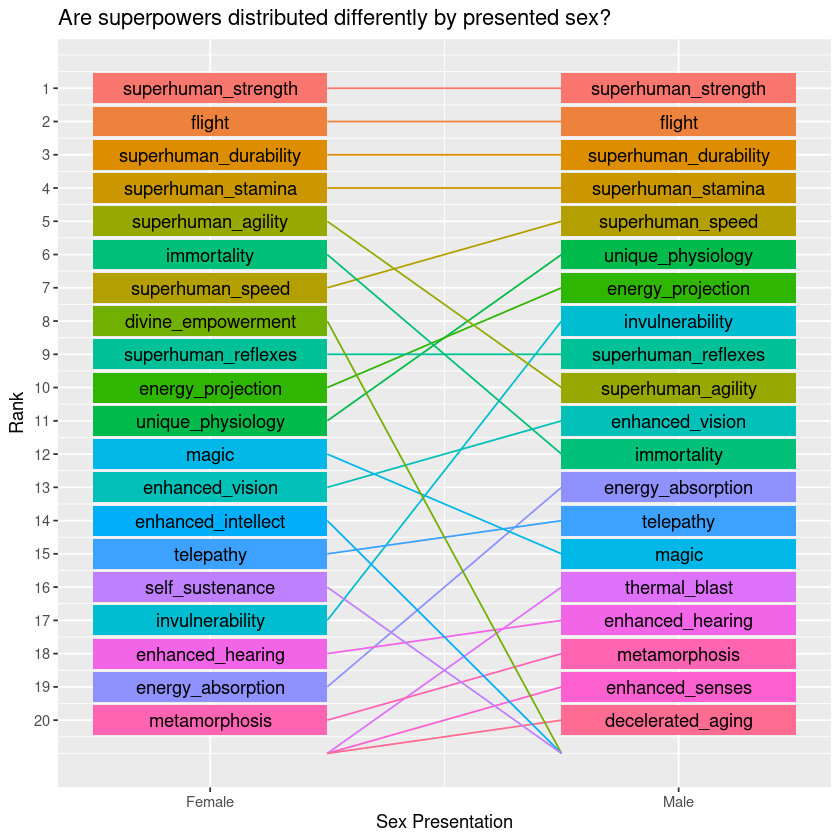

In [65]:


ggplot(ranked_gendered) +
    geom_rect(aes(xmin=gender_to_x(gender)-0.5,
              xmax=gender_to_x(gender)+0.5,
              ymin=rank-0.45,
              ymax=rank+0.45,
              fill=power),
              show.legend = FALSE) +
    geom_text(aes(x=gender_to_x(gender),
                  y=rank,
                  label=power)) +
    geom_segment(data=line_data,aes(x=-0.5,xend=0.5,
                            y=female_rank,
                            yend=male_rank,
                            color=power),
                 show.legend = FALSE) +
    ylim(0,21) +
    scale_y_reverse(breaks = 1:20) +
    scale_x_continuous(breaks=c(-1,1),
                       labels=c("Female","Male")) + 
    labs(x="Sex Presentation",y="Rank", title="Are superpowers distributed differently by presented sex?");


# What Makes A Visualization Good?

The primary benefit of a visualization is the ability to see a lot of
data at once in a way which your brain can interpret rapidly. Therefor
the science of good visualization is the science of what sorts of
aesthetics you can apprehend pre-attentively.

Everyone always burns the pie chart in effigy here, so lets do it:

![](./bad-pie-chart.png)

From
<https://www.r-bloggers.com/2015/12/fear-of-wapo-using-bad-pie-charts-has-increased-since-last-year/>

Pie Charts are bad because they make you judge areas of irregular shapes
which may not be adjacent.

Rule of Thumb: a visualization should focus on one or two distinctions
or trends which it should encode with:

1.  position
2.  color
3.  size
4.  shape

Roughly in that order. Size is best used to compare *adjacent lengths*.
Areas and volumes or lengths which are not near one another are quite
hard for people to judge accurately.

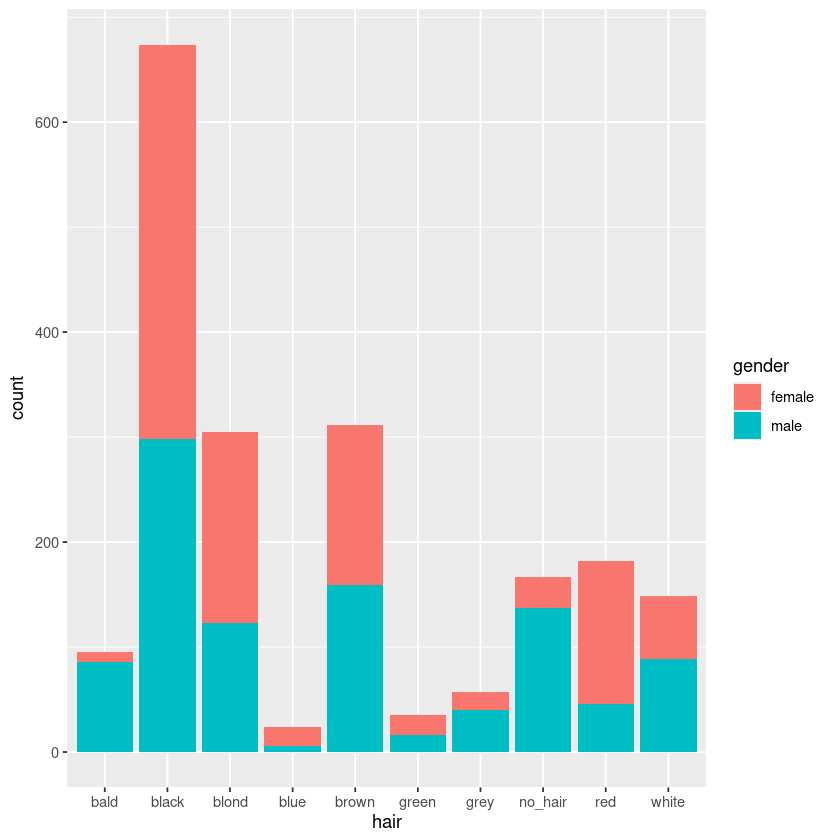

In [63]:
juxtapose <- function(df, p1, p2){
  df <- df %>% filter(property_name == p1 | property_name == p2);
  counts <- df %>% group_by(character, universe, property_name) %>% tally()
  df <- df %>% inner_join(counts, by=c("character","universe","property_name")) %>%
    filter(n==1) %>% select(-n);
  df %>% pivot_wider(id_cols=character:universe, names_from = "property_name",
                     values_from = "value") %>% filter(complete.cases(.));
}

gender_hair <- juxtapose(deduplicated, "gender", "hair");
important_hair <- gender_hair %>% group_by(hair) %>% tally() %>% 
  arrange(desc(n)) %>% 
  pull(hair) %>%
  head(10);

`%not_in%` <- function(x, a){
  !(x %in% a)
}

gender_hair <- gender_hair %>% filter(hair %in% important_hair &
                                        gender %in% c("male", "female"));

gender_hair <- rbind(gender_hair %>% filter(gender=="male") %>% sample_n(1000),
                     gender_hair %>% filter(gender=="female") %>% sample_n(1000));

ggplot(gender_hair, aes(hair)) + geom_bar(aes(fill=gender))



Compare this with

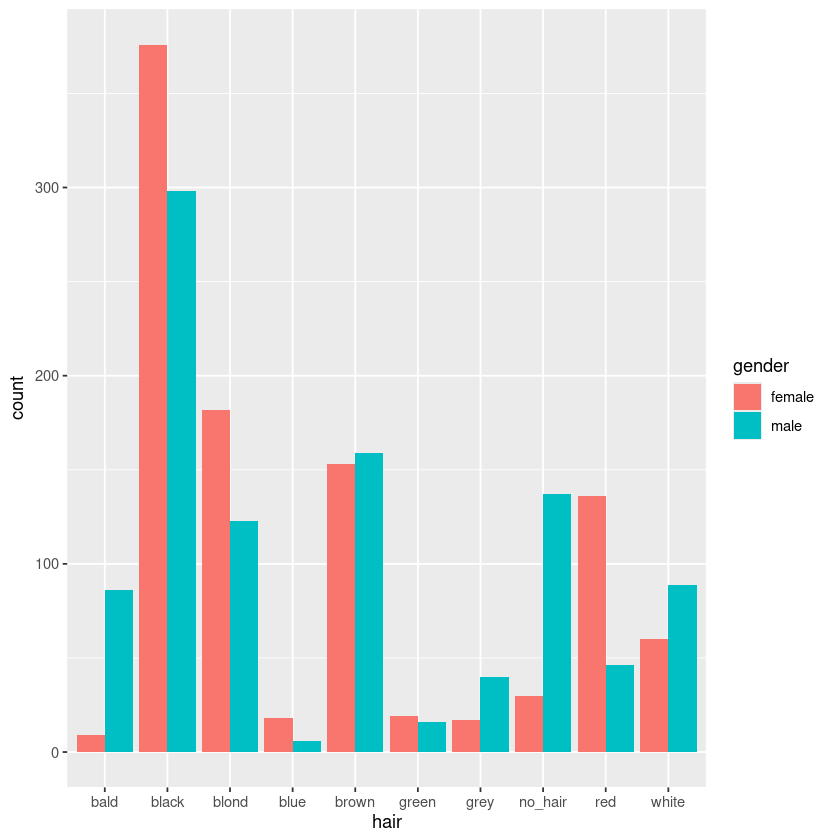

In [64]:
ggplot(gender_hair, aes(hair)) + geom_bar(aes(fill=gender),position="dodge");